# 20240115

## 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color) <- 선형회귀를 그림으로
- sns.regplot(x,y,data,fig_reg=False) <- 회귀를 그림으로

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [ ]:
# Q.NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
df['NDate'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,NDate
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [ ]:
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'], axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<Axes: xlabel='NDate'>

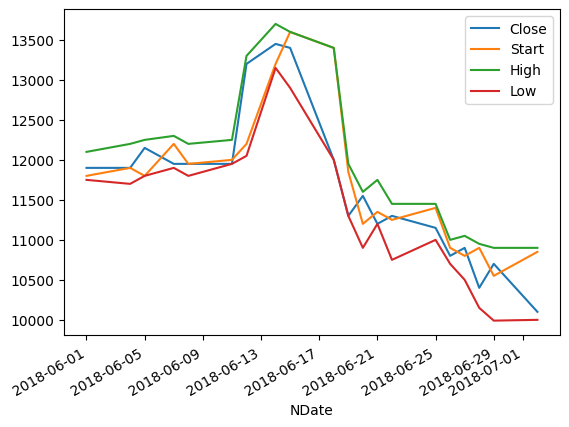

In [ ]:
# 선 그래프
df1.plot()

##### Q1_0115. df1 Close 컬럼으로 다음을 수행하세요.
- NDate 별 막대그래프
- 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현
- 히스토그램

<Axes: xlabel='NDate'>

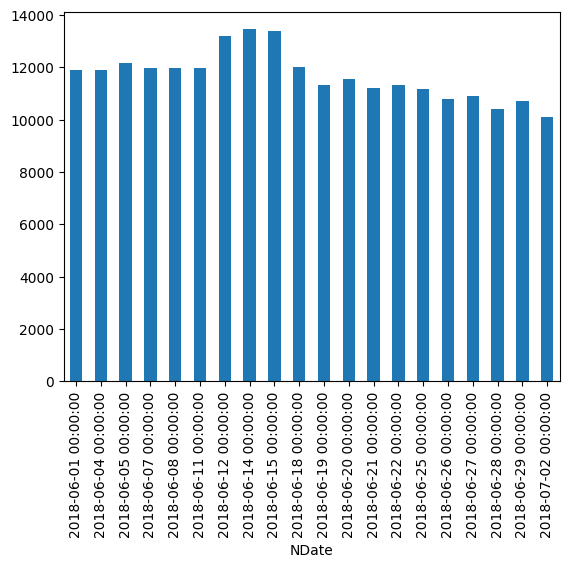

In [ ]:
# NDate 별 막대그래프
df1.sort_values(by='NDate')['Close'].plot(kind='bar')

<Axes: xlabel='NDate'>

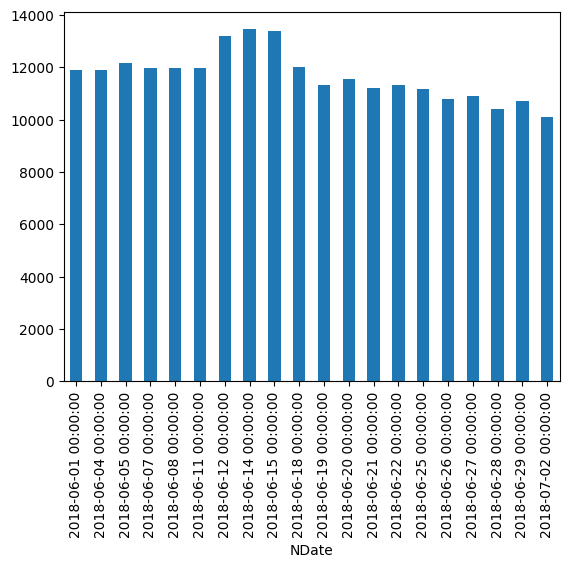

In [ ]:
df1.Close[::-1].plot(kind='bar')

<Axes: xlabel='NDate'>

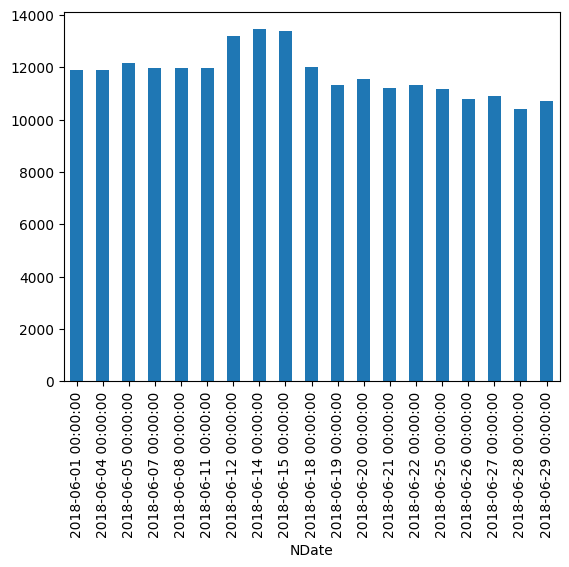

In [ ]:
# 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현
df2 = df1.sort_values(by='NDate').loc['2018-06-01':'2018-06-30']
df2['Close'].plot(kind='bar')

<Axes: ylabel='Frequency'>

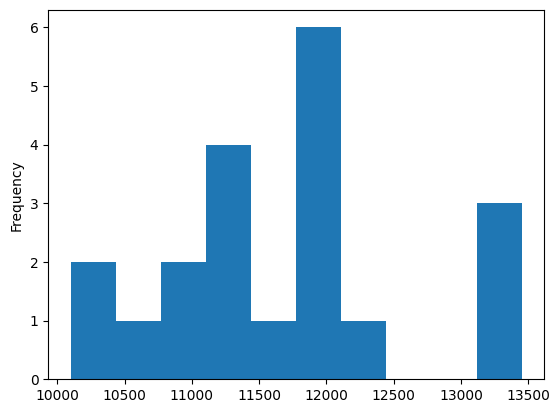

In [ ]:
# 히스토그램
df1['Close'].plot(kind='hist')
# df1['Close'].plot(kind='hist',bins=10)

##### Q2_0115. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.

<Axes: ylabel='Frequency'>

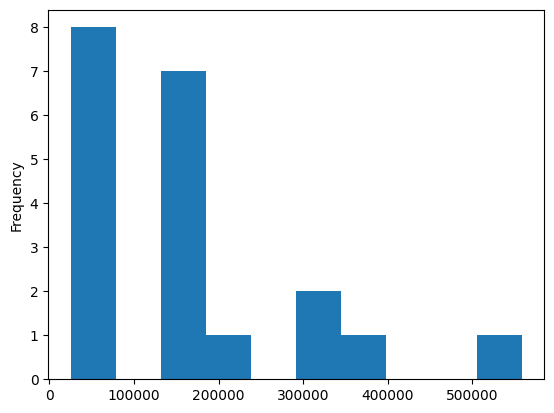

In [ ]:
df['Volume'].plot(kind='hist')

##### Q3_0115. df Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.

<Axes: xlabel='Close', ylabel='Volume'>

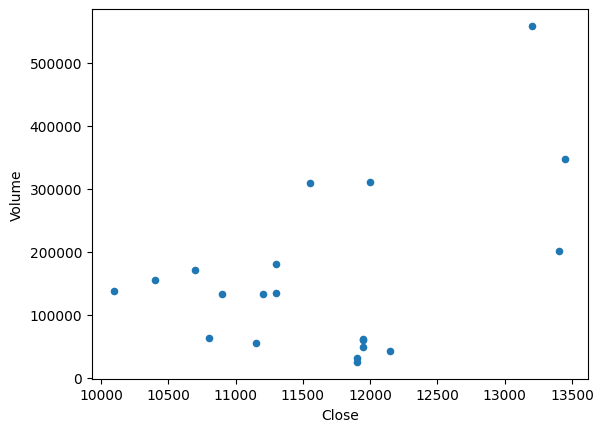

In [ ]:
df.plot(x='Close', y='Volume', kind='scatter')

##### Q4_0115. df1 Close 칼럼의 Box Plot을 표현하세요.

<Axes: >

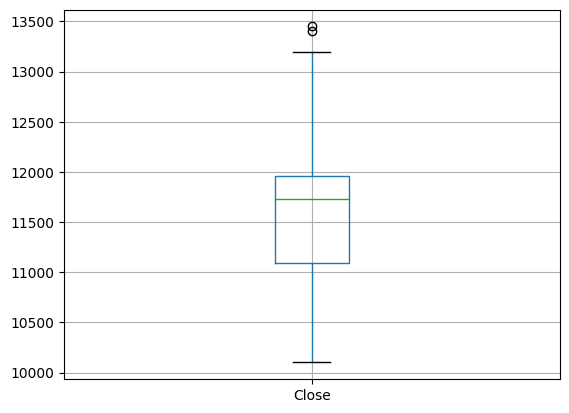

In [ ]:
df1.boxplot(column=['Close'])

<Axes: >

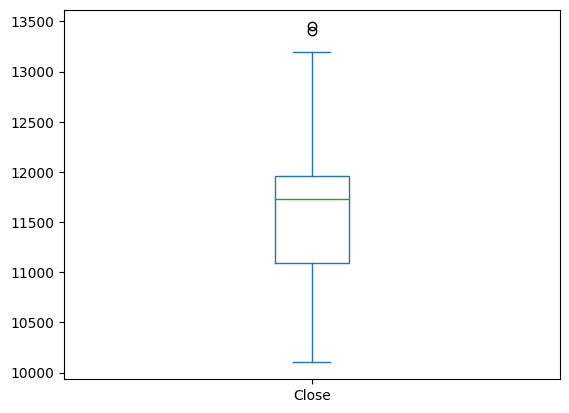

In [ ]:
df1.Close.plot(kind='box')

In [ ]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


In [ ]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [ ]:
df.Close.describe()['75%']

11962.5

In [ ]:
df.Close.describe()['25%']

11087.5

# 20240116

### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [ ]:
iqr = df.Close.describe()['75%'] - df.Close.describe()['25%']
uw_check = df.Close.describe()['75%'] + iqr*1.5
print(uw_check, '\n')
c = df.Close.sort_values(ascending=False)
print(c[:5],'\n')
df.Close[df.Close >= uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 



11    13400
12    13450
Name: Close, dtype: int64

In [ ]:
# Q. df에서 Close의 값이 이상치로 의심할 수 있는 관측치를 출력하세요.
lw_check = df.Close.describe()['25%'] - iqr*1.5
print(lw_check, '\n')
df.Close[(df.Close < lw_check) | (df.Close > uw_check)]

9775.0 



11    13400
12    13450
Name: Close, dtype: int64

In [ ]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close']<(Q1 - IQR *1.5)) | (df['Close']>(Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


##### Q1_0116. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

In [ ]:
Q1_start = df.Start.describe()['25%']
Q3_start = df.Start.describe()['75%']
IQR = Q3 - Q1
outliers = df[(df['Start']<(Q1-IQR*1.5)) | (df['Start']>(Q3+IQR*1.5))]
outliers

,Date,Close,Start,High,Low,Volume,NDate
10,2018-06-18,12000,13400,13400,12000,309787,2018-06-18
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15


In [ ]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Q. horsepower에서 문제가 되는 데이터를 horsepower의 평균값으로 대체해서 Dtype을 float64로 처리하세요.
df_auto.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [ ]:
import numpy as np
df_auto.horsepower.replace('?',np.nan, inplace=True)
df_auto.horsepower.fillna(df_auto.horsepower.mean(), inplace=True)
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


##### Q2_0116. mpg 컬럼의 이상치를 구하세요. (box plot, 이상치, 이상치 포함한 관측치)

<Axes: >

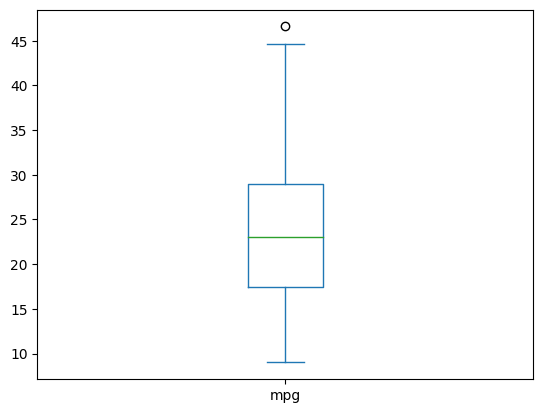

In [ ]:
df_auto.mpg.plot(kind='box')

In [ ]:
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
Q1_mpg = df_auto.mpg.describe()['25%']
Q3_mpg = df_auto.mpg.describe()['75%']
IQR = Q3_mpg - Q1_mpg
# mpg 이상치
print('이상치:',df_auto.mpg[(df_auto.mpg < Q1_mpg - 1.5*IQR) | (df_auto.mpg > Q3_mpg + 1.5*IQR)])
# 이상치 포함한 관측치
outliers_mpg = df_auto[(df_auto.mpg < Q1_mpg - 1.5*IQR) | (df_auto.mpg > Q3_mpg + 1.5*IQR)]
outliers_mpg

이상치: 322    46.6
Name: mpg, dtype: float64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


### seaborn boxplot

In [ ]:
import pandas as pd
fish_multi = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<Axes: xlabel='species', ylabel='length'>

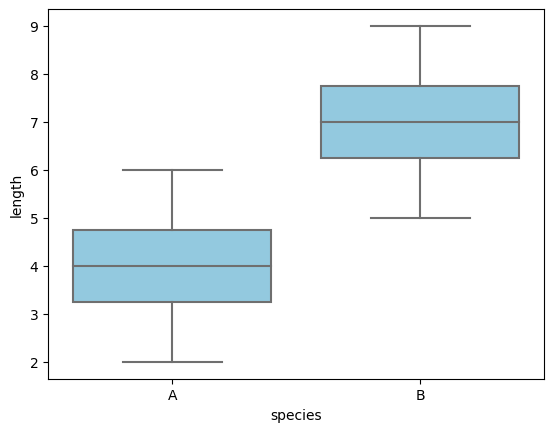

In [ ]:
# fish_multi.groupby('species').plot(kind='box')
import seaborn as sns
sns.boxplot(x='species',y='length',data=fish_multi, color='skyblue')

In [ ]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

##### Q3_0116. A,B 그룹의 Box Plot을 그리고 이상치를 구하세요.

A그룹 이상치: 5    10
Name: length, dtype: int64
B그룹 이상치: 10    2
Name: length, dtype: int64


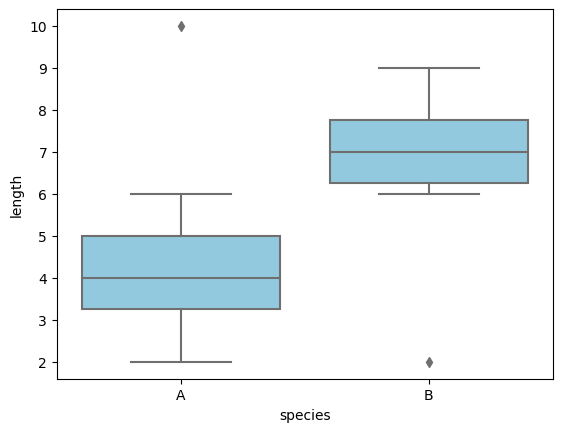

In [ ]:
import seaborn as sns
sns.boxplot(x='species',y='length',data=fish_multi, color='skyblue')
Q1_a = fish_multi.groupby('species').describe().length['25%']['A']
Q3_a = fish_multi.groupby('species').describe().length['75%']['A']
IQR_a = Q3_a - Q1_a
fish_A = fish_multi[fish_multi['species']== 'A']
print("A그룹 이상치:",fish_A.length[(fish_A.length < Q1_a - 1.5*IQR_a) | (fish_A.length > Q3_a + 1.5*IQR_a)])
Q1_b = fish_multi.groupby('species').describe().length['25%']['B']
Q3_b = fish_multi.groupby('species').describe().length['75%']['B']
IQR_b = Q3_b - Q1_b
fish_B = fish_multi[fish_multi['species']=='B']
print("B그룹 이상치:",fish_B.length[(fish_B.length < Q1_b - 1.5*IQR_b) | (fish_B.length > Q3_b + 1.5*IQR_b)])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot 그리기
sns.boxplot(x='species', y='length', data=fish_multi)
plt.show()

# 이상치 계산 및 출력
for species in fish_multi['species'].unique():    #unique 특정열의 모든 고유 값을 반환
    group = fish_multi[fish_multi['species'] == species]
    Q1 = group['length'].quantile(0.25)
    Q3 = group['length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['length'] < lower_bound) | (group['length'] > upper_bound)]
    print(f"이상치 for species {species}:\n{outliers}\n")

In [ ]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
data = np.random.rand(10000)*1000
df = pd.DataFrame(data,columns=['Num'])
print(df.head())
df.describe()

          Num
0  911.470973
1  877.682644
2   28.985246
3   66.851035
4  336.016983


,Num
count,10000.000000
mean,500.101373
std,288.313960
min,0.209899
25%,246.706608
50%,498.555128
75%,751.360155
max,999.931290


<Axes: ylabel='Frequency'>

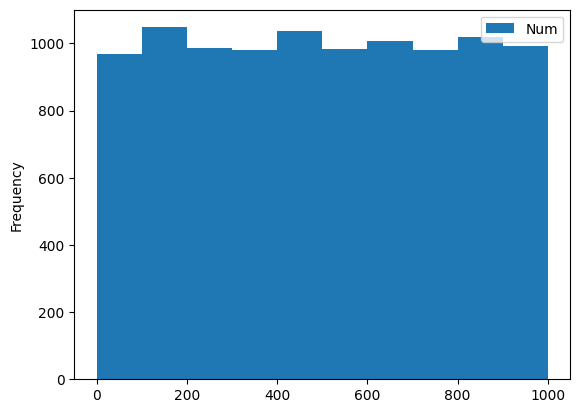

In [ ]:
df.plot(kind='hist')

        Num
0 -0.303299
1  0.157649
2 -0.377014
3  0.459565
4 -0.178687
                  Num
count  1000000.000000
mean         0.000960
std          1.000737
min         -4.861188
25%         -0.674877
50%          0.002184
75%          0.676576
max          4.587375
Axes(0.125,0.11;0.775x0.77)


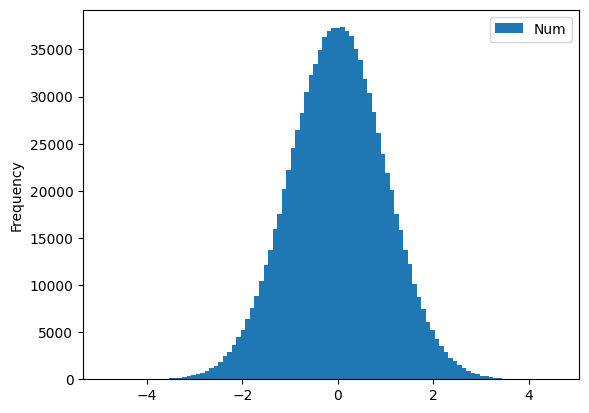

In [ ]:
# Q. 평균 0, 표준편차 1인 표준정규분포 난소 10000개로 데이터프레임 생성.
# 통계요약표 및 시각화를 수행하세요 (컬럼명 'Num')
data = np.random.randn(1000000)
df = pd.DataFrame(data, columns = ['Num'])
print(df.head())
print(df.describe())
print(df.plot(kind='hist', bins=100))

In [ ]:
print(df.Num.mean())
print(df.Num.std())

0.0009596033679292935
1.0007367924258368


         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


<Axes: ylabel='Frequency'>

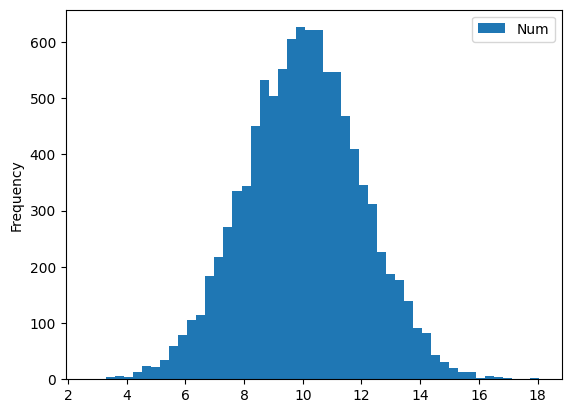

In [ ]:
#정규분포
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2,size=10000) # 평균 10, 표준편차 2, 샘플 10000
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='hist',bins=50)

In [ ]:
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns =['A','B','C','D'])
print(df)

              A         B         C         D
one    0.865081  0.032853  0.933223  0.267461
two    0.124448  0.340698  0.765585  0.090553
three  0.310120  0.890913  0.894145  0.270737
four   0.335384  0.077759  0.169704  0.280080
five   0.314396  0.789679  0.982823  0.394681
six    0.787791  0.204297  0.848268  0.705182


<Axes: >

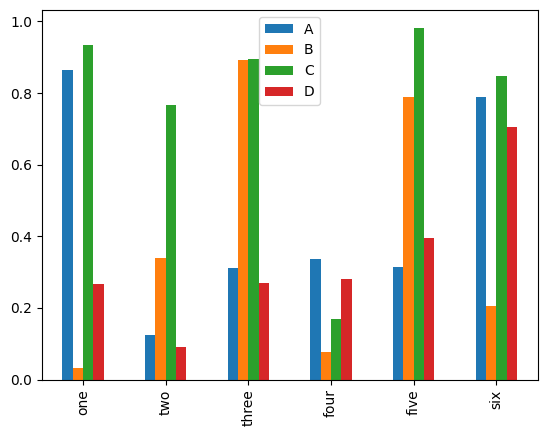

In [ ]:
df.plot(kind='bar')

<Axes: >

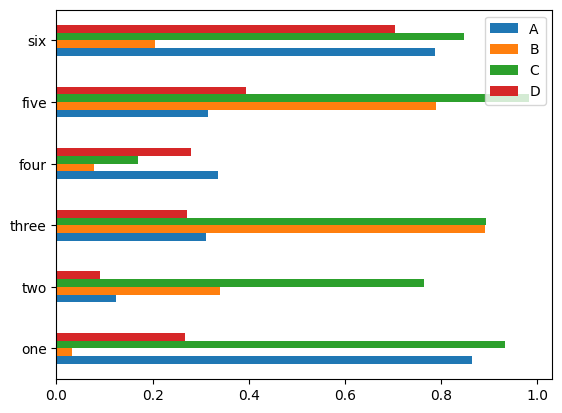

In [ ]:
df.plot(kind='barh')

<Axes: >

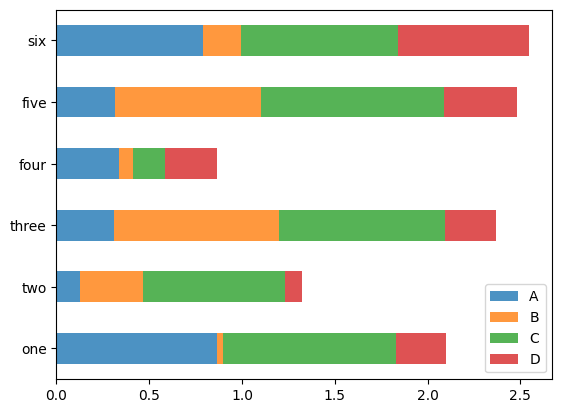

In [ ]:
df.plot(kind='barh',stacked=True,alpha=0.8)

##### Q4_0116. 아래 df에 대하여 수직 막대그래프, 수평 막대그래프, 스택 막대그래프를 작성하세요.

<Axes: >

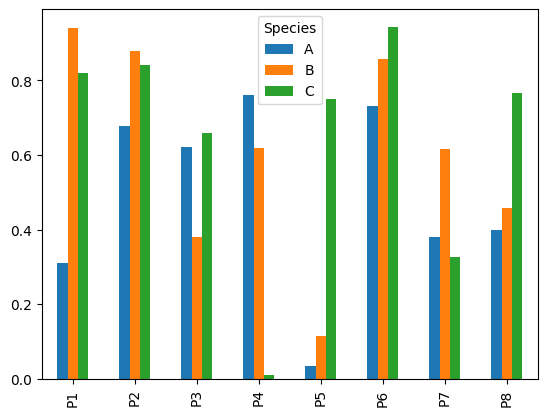

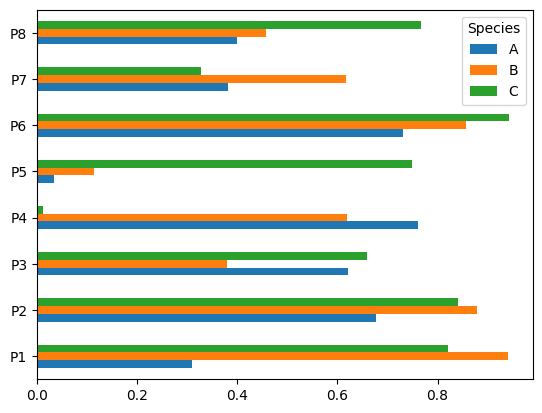

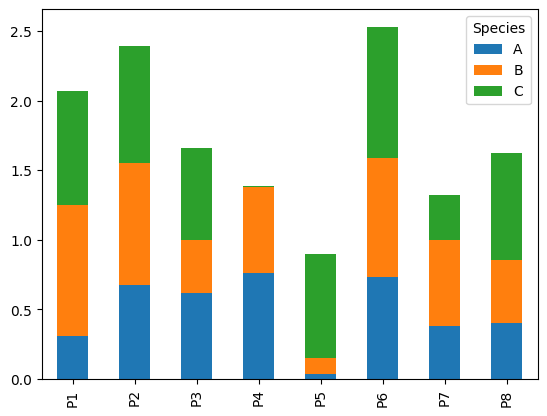

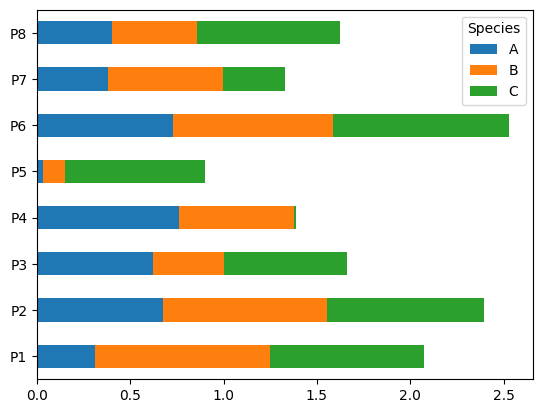

In [ ]:
# Matplotlib을 사용하여 데이터프레임으로 수직, 수평, 스택 막대그래프 작성

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 생성
df = pd.DataFrame(np.random.rand(8,3),
                  index=['P1','P2','P3','P4','P5','P6','P7','P8'],
                  columns=pd.Index(['A','B','C'], name='Species'))

df.plot(kind='bar')
df.plot(kind='barh')
df.plot(kind='bar', stacked=True)
df.plot(kind='barh',stacked=True)

<Axes: >

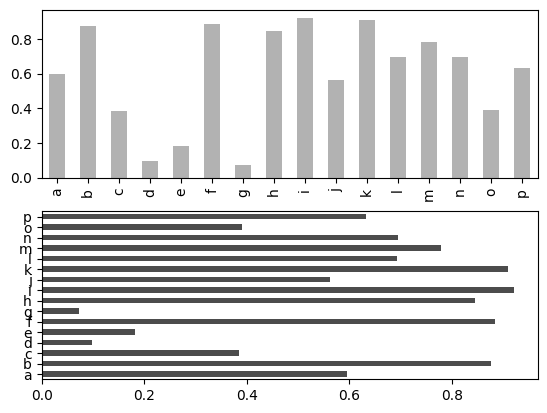

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k',alpha=0.3)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

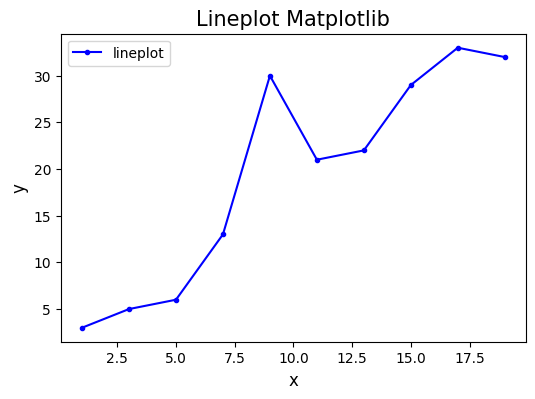

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(6,4))
plt.plot(x,y,color='blue',marker='o', markersize=3)
plt.title('Lineplot Matplotlib', size=15)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.legend(labels=['lineplot'])

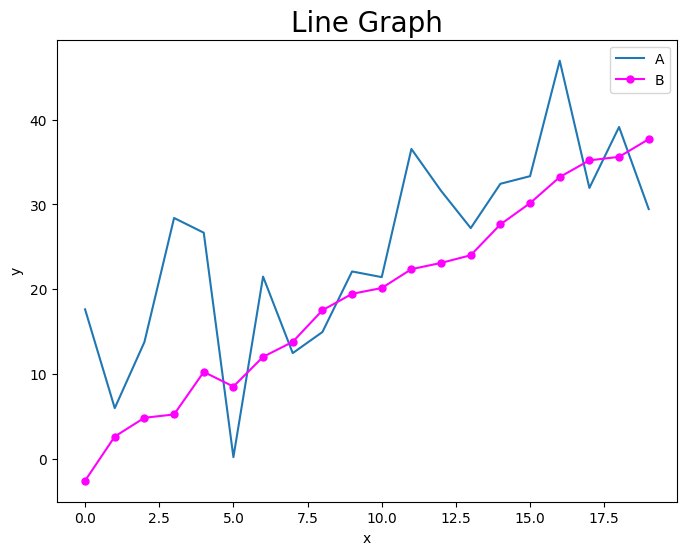

In [ ]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize = (8,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o', markersize=5)
plt.xlabel('x',size=10)
plt.ylabel('y', size=10)
plt.title('Line Graph', size=20)
plt.legend(['A','B'])

range(0, 10)
[8 5 7 6 3 4 6 5 6 8]


Text(0.5, 0, 'x')

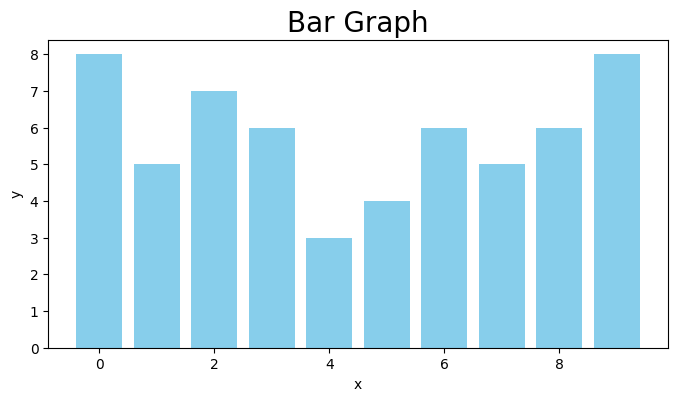

In [ ]:
# 과제 - 추가 decoration
# 막대 그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.title('Bar Graph',size=20)
plt.ylabel('y')
plt.xlabel('x')

Text(0.5, 0, 'mpg')

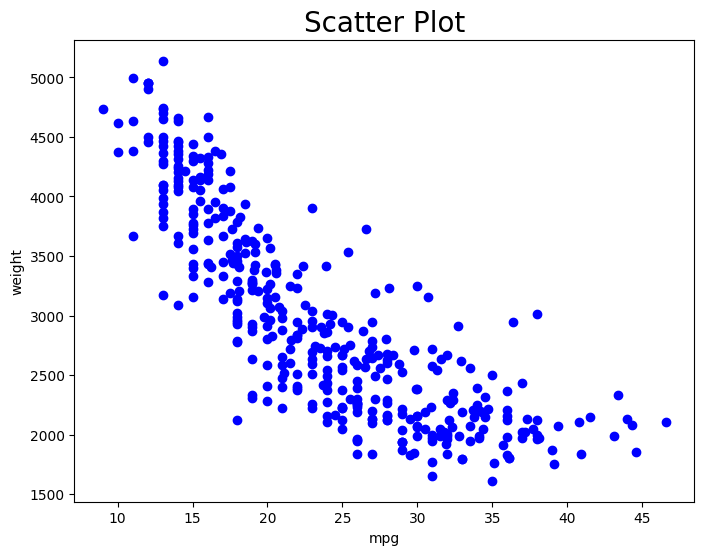

In [ ]:
# scatter plot
df_auto = pd.read_excel('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue')
plt.title('Scatter Plot', size=20)
plt.ylabel('weight')
plt.xlabel('mpg')

(array([ 3.,  4.,  6., 39., 17., 22., 16., 36., 21., 19., 14., 28., 16.,
        21., 17., 22., 12., 14., 16., 11., 11., 10.,  6.,  6.,  2.,  3.,
         0.,  3.,  2.,  1.]),
 array([ 9.        , 10.25333333, 11.50666667, 12.76      , 14.01333333,
        15.26666667, 16.52      , 17.77333333, 19.02666667, 20.28      ,
        21.53333333, 22.78666667, 24.04      , 25.29333333, 26.54666667,
        27.8       , 29.05333333, 30.30666667, 31.56      , 32.81333333,
        34.06666667, 35.32      , 36.57333333, 37.82666667, 39.08      ,
        40.33333333, 41.58666667, 42.84      , 44.09333333, 45.34666667,
        46.6       ]),
 <BarContainer object of 30 artists>)

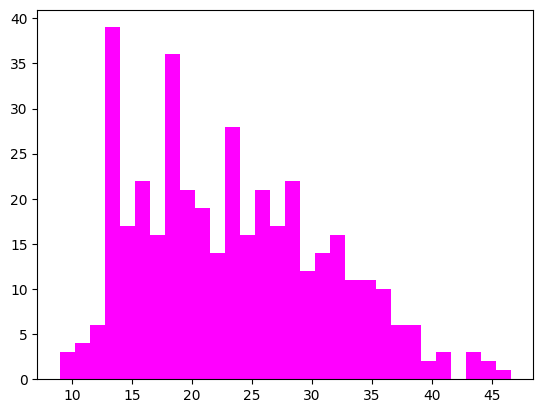

In [ ]:
# histogram
plt.hist(df_auto.mpg,bins=30,color='magenta')

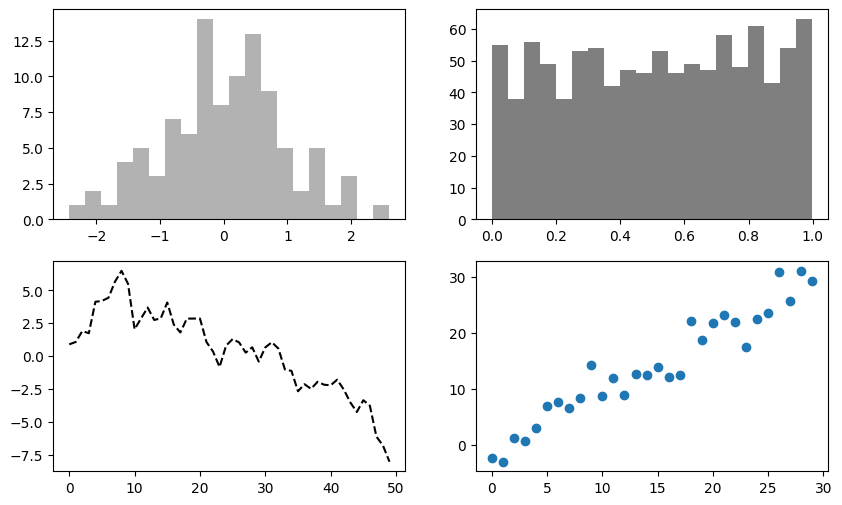

In [ ]:
# subplot을 만드는 1번째 방법
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

##### Q5_0116. 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/주가데이터.csv')
df.head()
df['NDate'] = pd.to_datetime(df['Date'])
df1 = df.set_index('NDate')

In [ ]:
df1.head()

,Date,Close,Start,High,Low,Volume
NDate,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df1 = df1[::-1]
df1.head()

,Date,Close,Start,High,Low,Volume
NDate,,,,,,
2018-06-01,2018-06-01,11900,11800,12100,11750,32062
2018-06-04,2018-06-04,11900,11900,12200,11700,25171
2018-06-05,2018-06-05,12150,11800,12250,11800,42485
2018-06-07,2018-06-07,11950,12200,12300,11900,49088
2018-06-08,2018-06-08,11950,11950,12200,11800,59258


TypeError: Axes.bar() missing 2 required positional arguments: 'x' and 'height'

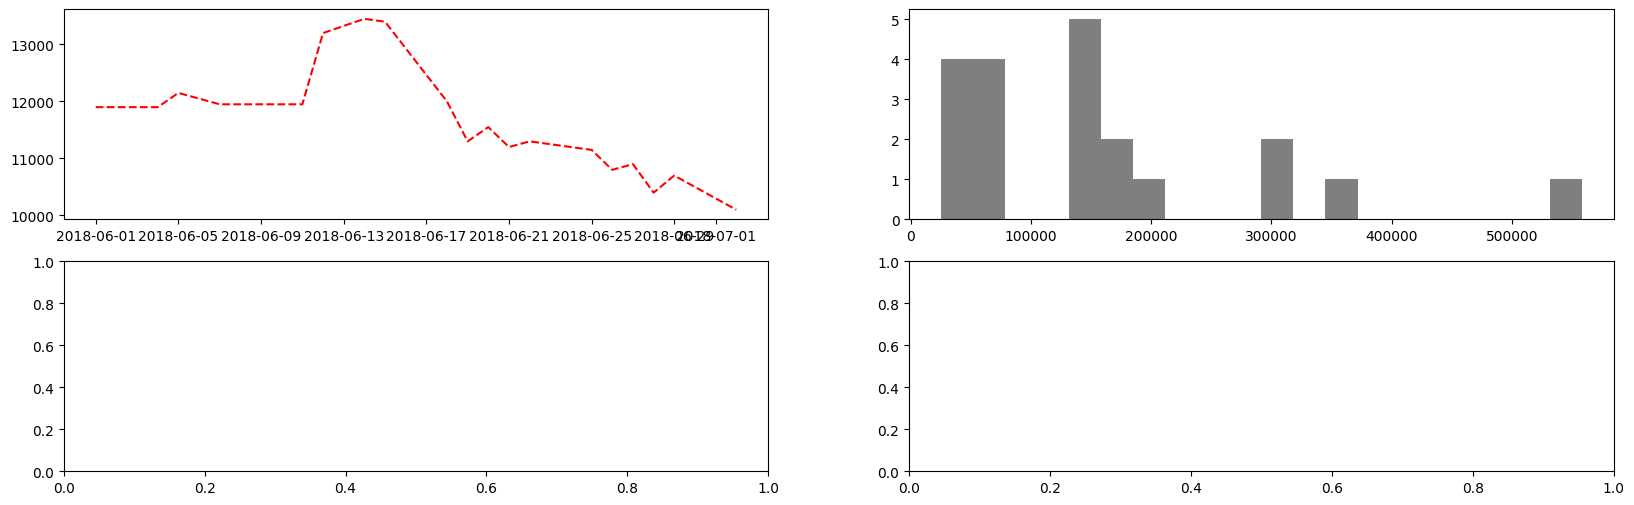

In [ ]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(df1.Close, 'r--')
ax2.hist(df1.Volume,color='k', bins=20, alpha=0.5)
ax2.bar(x = df1.index, y=df1.Volume, width=0.8, color='skyblue')

(array([2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+01, 1.80000e+01,
        5.60000e+01, 1.49000e+02, 3.53000e+02, 8.41000e+02, 1.77500e+03,
        3.82300e+03, 7.69300e+03, 1.49450e+04, 2.78180e+04, 4.87720e+04,
        8.14740e+04, 1.29242e+05, 1.96060e+05, 2.80838e+05, 3.83394e+05,
        5.00282e+05, 6.18789e+05, 7.31164e+05, 8.19072e+05, 8.74381e+05,
        8.88616e+05, 8.59857e+05, 7.89064e+05, 6.90373e+05, 5.75677e+05,
        4.55664e+05, 3.42969e+05, 2.46462e+05, 1.68980e+05, 1.09619e+05,
        6.69590e+04, 3.94960e+04, 2.21040e+04, 1.19790e+04, 6.01600e+03,
        2.87900e+03, 1.34500e+03, 5.76000e+02, 2.45000e+02, 1.05000e+02,
        3.80000e+01, 1.30000e+01, 7.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([-5.65274813, -5.42944097, -5.20613381, -4.98282665, -4.75951949,
        -4.53621233, -4.31290517, -4.08959801, -3.86629085, -3.64298369,
        -3.41967653, -3.19636937, -2.97306221, -2.74975505, -2.52644789,
        -2.30314073, -2.07983357, -1.85652641, -1

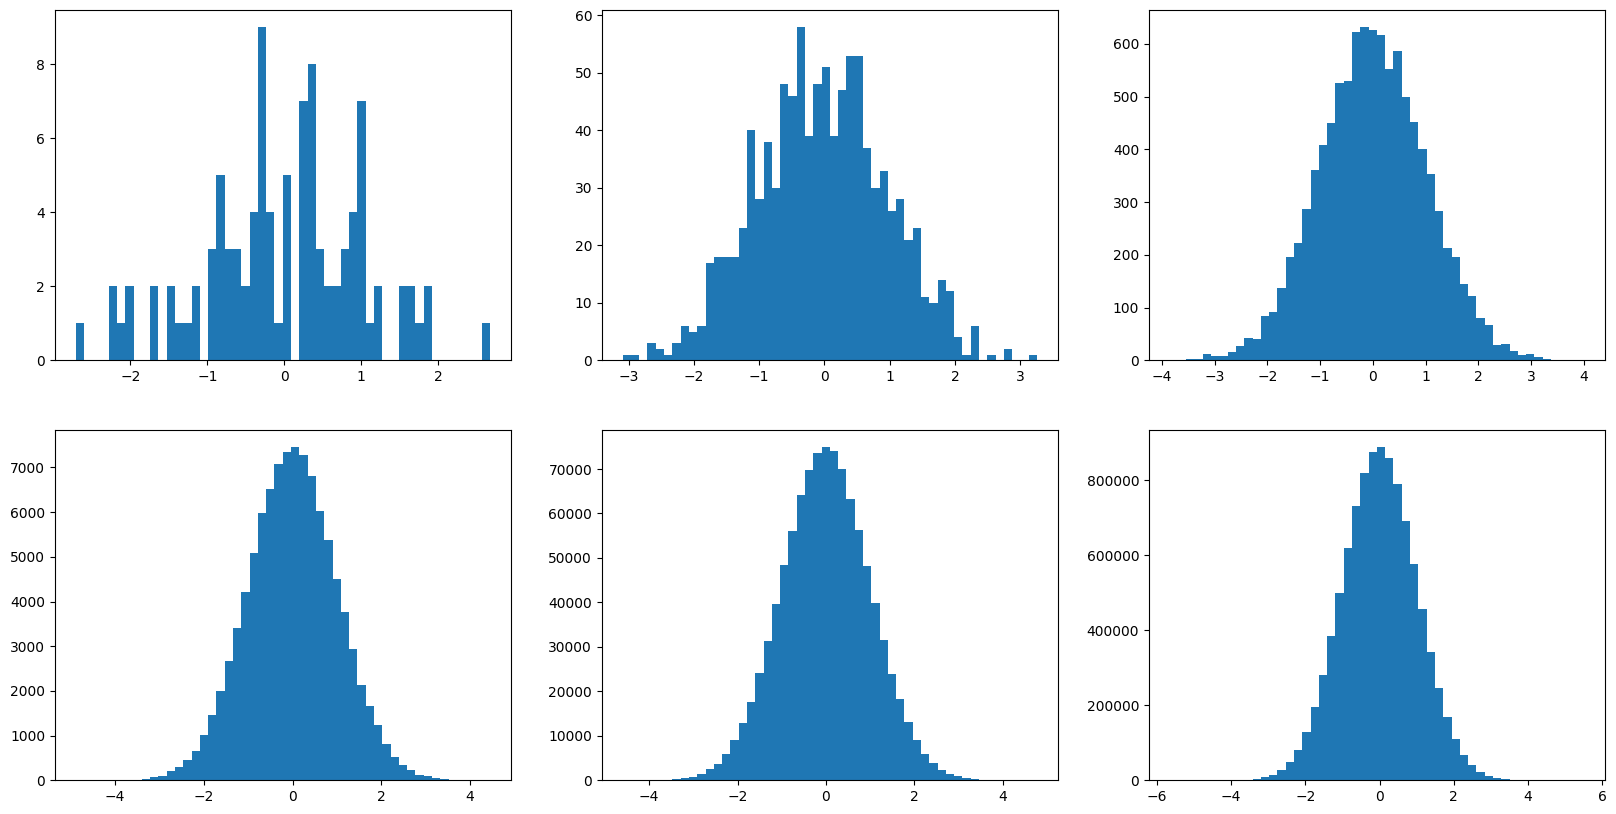

In [ ]:
# subplot을 만드는 2번째 방법
fig,axes = plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)


##### Q6_0116. plt.subplots를 사용하여 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2x2 그래프를 작성하세요.

In [ ]:
import numpy as np
age = np.arange(20)
height = np.array([30,45,70,80,90,100,110,118,125,129,134,141,147,156,164,167,169,171,173,175])

<BarContainer object of 20 artists>

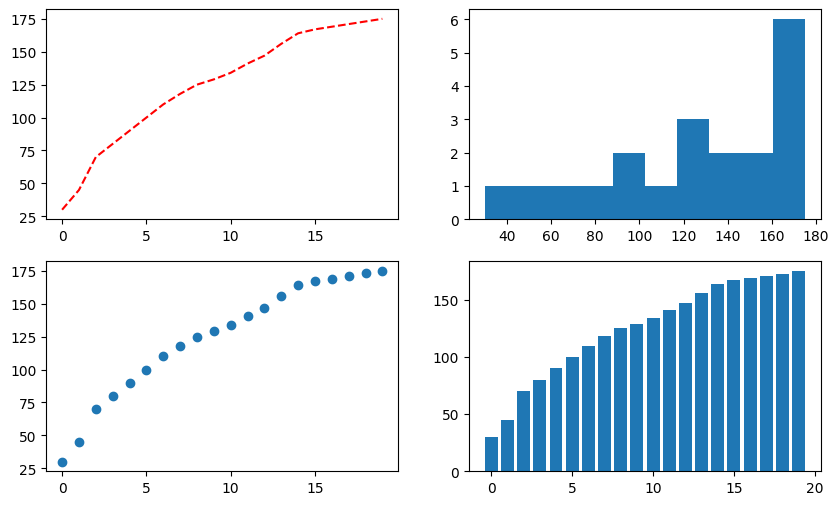

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
axes[0,0].plot(age,height,'r--')
axes[0,1].hist(height,bins=10)
axes[1,0].scatter(age,height)
axes[1,1].bar(age,height)

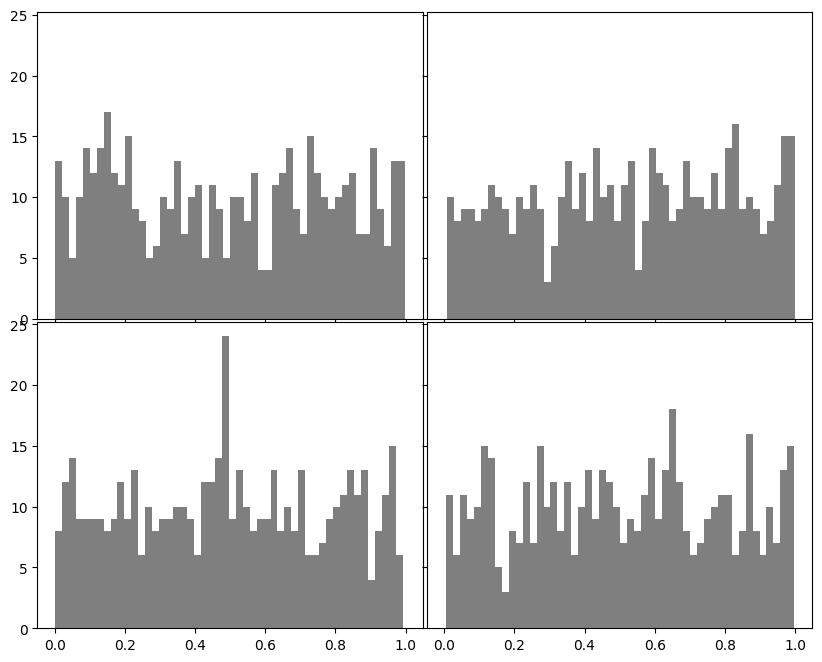

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(10,8), sharex=True,sharey=True)
for i in range(2):
  for j in range(2):
    axes[i,j].hist(np.random.rand(500), bins=50, color='k',alpha=0.5)
plt.subplots_adjust(wspace=0.01, hspace=0.01) #wspace 랑 hspace라는 것은 subplot끼리의 사이 공간을 의미

In [ ]:
plt.style.available # 이런 스타일 있으니, 참고해서 마음에 드는 것 쓰면 됨.

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
# Google Colab에는 한국어 글꼴이 사전 설치되어 있지 않으므로 수동으로 설치
!sudo apt-get install -y fonts-nanum #'NanumBarunGothic' 글꼴을 설치
!sudo fc-cache -fv # 글꼴 캐시를 새로 고치고
!rm ~/.cache/matplotlib -rf # Matplotlib 캐시를 지운다.
# 그런다음에 런타임>세션 다시 시작 하기!!

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,067 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

In [ ]:
import numpy as np
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

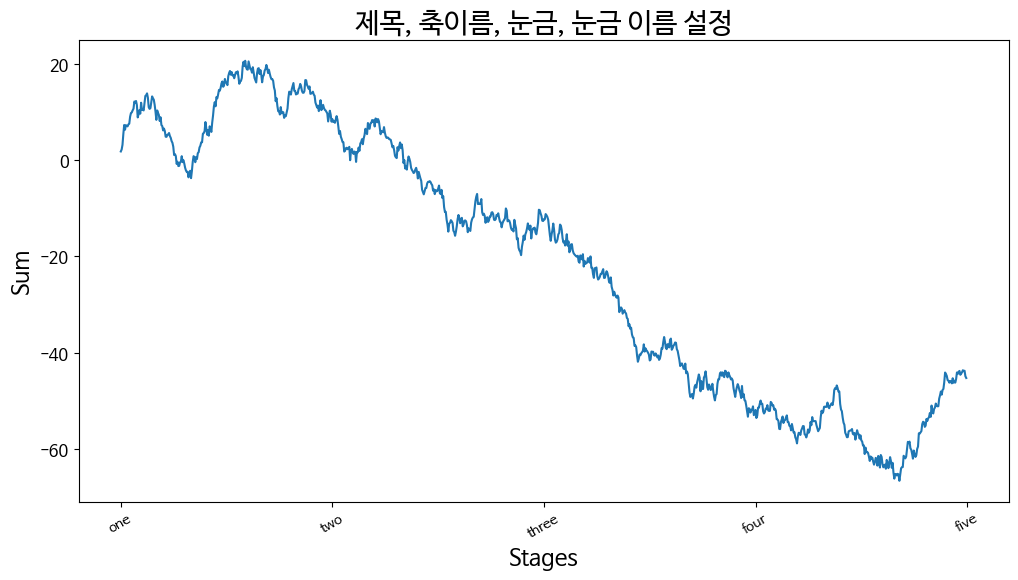

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font',size=12,family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation=30, fontsize='small') # rotation이라는 것은 축 눈금 라벨이 30도 틀어져서 보이는 것
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=20)
ax.set_xlabel('Stages',size=16)
ax.set_ylabel('Sum',size=16)
plt.show()

##### Q7_0116. 임의의 수치 데이터를 생성하고, 이를 이용해 sin(x) 그래프를 그리세요.
- X축과 Y축에 적절한 레이블을 추가하세요.
- 그래프에 제목을 추가하세요.

Text(0.5, 0, '시간')

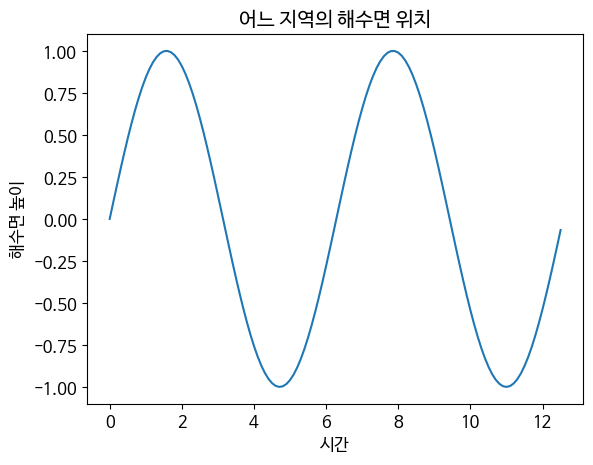

In [ ]:
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)

plt.plot(x,y)
plt.title('어느 지역의 해수면 위치')
plt.ylabel('해수면 높이')
plt.xlabel('시간')

##### Q8_0116. 정규 분포를 따르는 임의의 데이터를 생성한 후 아래를 수행하세요.
- 생성된 데이터를 사용하여 히스토그램을 그리세요.
- 히스토그램의 빈(bin)수를 조정해 보세요.

Text(0.5, 1.0, '최근 100년간의 1월 평균 일최고온도 빈도수')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(

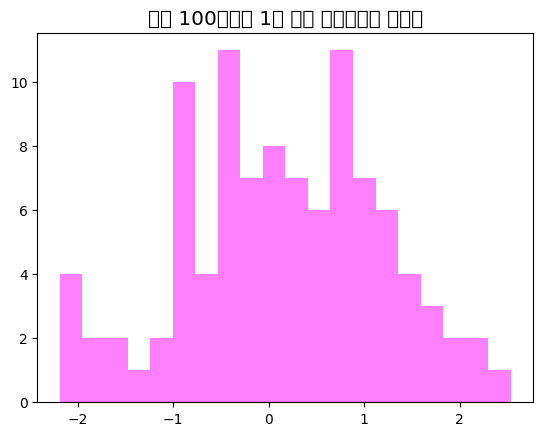

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data8 = np.random.randn(100)
plt.hist(data8, bins=20, color='magenta',alpha=0.5)
plt.rc('font',size=12,family = 'NanumBarunGothic')
plt.title('최근 100년간의 1월 평균 일최고온도 빈도수')

(array([  1.,   1.,   3.,   1.,   2.,   0.,   5.,   4.,   2.,   5.,   6.,
         4.,   6.,  14.,  10.,  11.,  15.,  29.,  23.,  29.,  44.,  45.,
        43.,  64.,  59.,  76.,  81.,  93., 104., 130., 114., 121., 158.,
       165., 175., 175., 196., 209., 219., 225., 246., 249., 248., 311.,
       275., 289., 277., 273., 305., 293., 278., 260., 266., 271., 265.,
       265., 248., 237., 230., 232., 200., 190., 178., 170., 152., 141.,
       133., 115.,  96.,  87.,  69.,  77.,  65.,  51.,  43.,  32.,  40.,
        26.,  19.,  26.,  17.,  18.,  18.,   8.,   8.,   9.,   3.,   3.,
         2.,   3.,   5.,   4.,   4.,   0.,   0.,   0.,   1.,   1.,   0.,
         1.]), array([151.02393047, 151.4683053 , 151.91268013, 152.35705496,
       152.80142979, 153.24580462, 153.69017945, 154.13455428,
       154.57892911, 155.02330393, 155.46767876, 155.91205359,
       156.35642842, 156.80080325, 157.24517808, 157.68955291,
       158.13392774, 158.57830257, 159.0226774 , 159.46705223,
       159.9

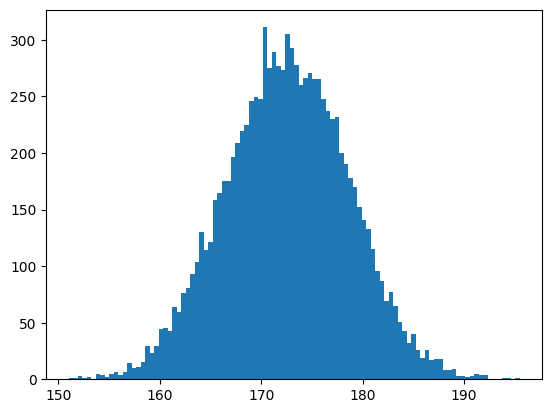

In [ ]:
from scipy import stats
data = stats.norm.rvs(loc = 172.5, scale = 6, size = 10000)
print(plt.hist(data, bins = 100))

##### Q9_0116. 두 개의 연관된 변수를 가지는 데이터셋을 생성 (예: 키와 몸무게) 한 후 아래를 수행하세요.
- 이 데이터를 사용하여 산점도를 그리세요.
- X축과 Y축에 적절한 레이블과 제목을 추가하세요.

Text(0.5, 0, 'heights')

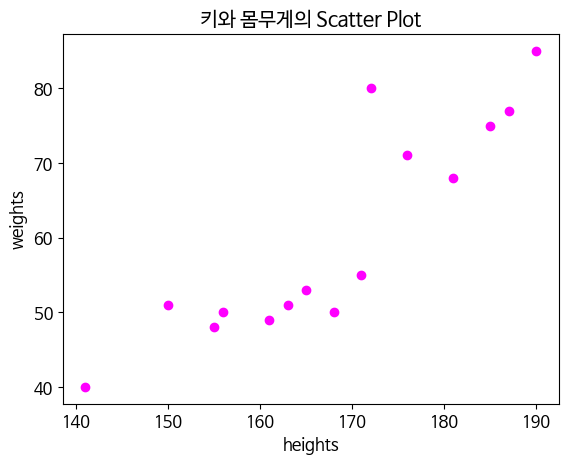

In [ ]:
heights = np.array([141,150,155,156,161,163,165,168,171,172,176,181,185,187,190])
weights = np.array([40,51,48,50,49,51,53,50,55,80,71,68,75,77,85])
plt.scatter(heights, weights,color='magenta')
plt.title('키와 몸무게의 Scatter Plot')
plt.ylabel('weights')
plt.xlabel('heights')

- np.random.normal(loc,scale,size)은 더 일반적인 경우에 사용. 사용자가 평균과 표준 편차를 직접 지정할 수 있기 때문에, 특정한 정규 분포에서 샘플링이 필요한 경우에 적합
- np.random.randn은 표준 정규 분포(즉, 평균이 0이고 표준 편차가 1인 정규 분포)에서 샘플링할 때 사용. 이는 많은 통계적 실험과 시뮬레이션에서 기본값으로 쓰이는 분포.

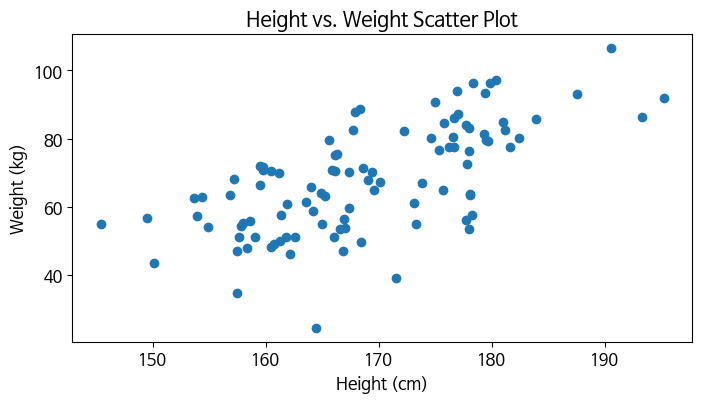

In [ ]:
height = np.random.normal(170,10,100)
weight = height - 102.5 + np.random.normal(0,10,100)

plt.figure(figsize=(8,4))
plt.scatter(height, weight)
plt.title("Height vs. Weight Scatter Plot")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

##### Q10_0116. 여러 개의 서로 다른 데이터셋을 생성한 후 이 데이터셋을 사용하여 하나의 창(window)에 여러 개의 서브플롯에 다른 유형의 그래프를 그려보세요 (예: 선 그래프, 막대 그래프, 산점도, 히스토그램).

In [ ]:
import numpy as np
math_score = np.random.randint(40,100,size=20)
english_score = np.random.randint(50,100, size=20)
math_score=np.sort(math_score)
english_score = np.sort(english_score)
av_math_score = np.random.randint(50,100,size=10) # 10개월간 average 수학점수
print("수학점수:", math_score)
print("영어점수:", english_score)
print("최근 10개월간 반평균 수학점수:", av_math_score)

수학점수: [43 44 45 47 49 51 55 55 59 64 71 79 82 88 89 93 94 94 95 98]
영어점수: [51 53 53 55 56 65 69 73 75 75 77 77 79 80 86 86 88 90 97 98]
최근 10개월간 반평균 수학점수: [88 74 57 90 89 51 92 67 84 56]


<BarContainer object of 10 artists>

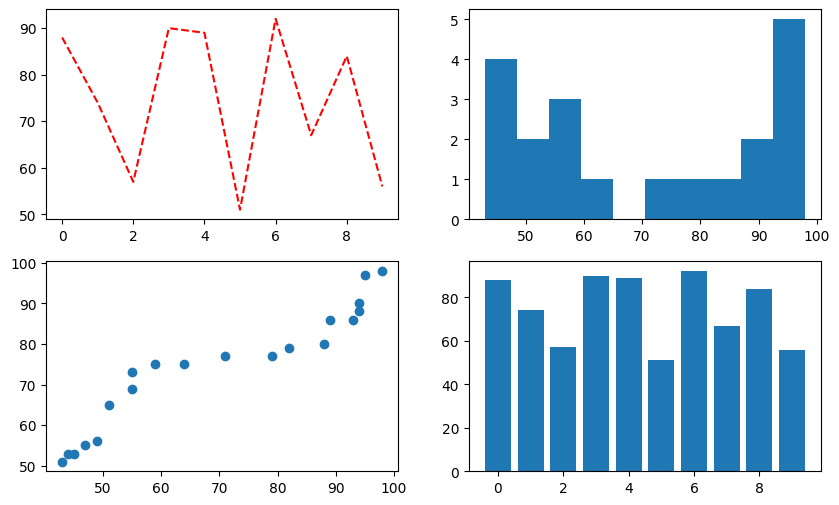

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(10,6))
axes[0,0].plot(av_math_score,'r--')
axes[0,1].hist(math_score,bins=10)
axes[1,0].scatter(math_score,english_score)
axes[1,1].bar(np.arange(10),av_math_score)

# 20240117

Q. 카테고리별로 나뉘는 데이터를 생성하세요 (예: 다섯 가지 다른 과일의 판매량).
이 데이터를 사용하여 파이 차트를 그리세요.
파이 차트에서 각 섹션에 레이블을 추가하고, 한 섹션을 강조하세요 (예: 'explode' 기능 사용).
- sizes는 각 조각의 크기.
- explode는 위에서 정의된 'explode' 설정을 적용.
- labels는 각 조각에 대한 라벨을 지정.
- autopct='%1.1f%%'는 각 조각에 표시될 비율을 포맷합니다. 여기서 %1.1f%%는 소수점 한 자리까지 비율을 표시하라는 의미.
- shadow=True는 차트에 그림자를 추가.
- startangle=90는 첫 조각이 시작될 각도를 90도로 설정. 이는 차트가 위쪽에서 시작하도록 한다.

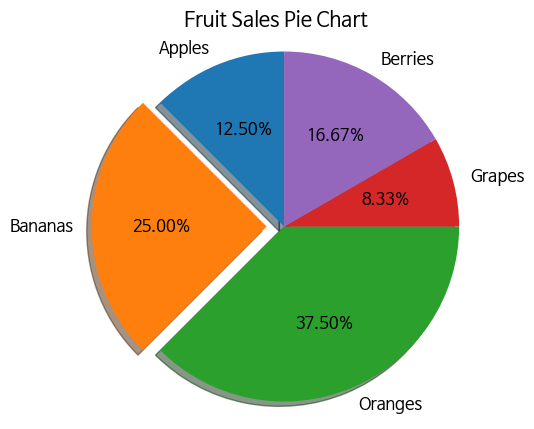

In [ ]:
# 파이 차트
import matplotlib.pyplot as plt
labels = 'Apples', 'Bananas','Oranges','Grapes','Berries'
sizes = [15,30,45,10,20]
explode = (0,0.1,0,0,0) # "explode" the 2nd slice (Bananas) 그리고 0.1 말고 큰 숫자를 주면 더 떨어지게 되고, 적은 숫자를 주면 파이차트와 더 가까워 짐.

plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90) # 여기서는 소수점 2번째 까지
plt.axis('equal') # 차트가 원형으로 유지되도록 한다. 즉, 가로세로 비율이 같도록 설정
plt.title("Fruit Sales Pie Chart")
plt.show()

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Q. age 컬럼을 범주화하여 파이차트롤 작성하세요.
- 범주화: 'teen', 'adult','elder','mature','young'

In [ ]:
def get_cat(age):
    cat = ''
    if np.isnan(age): cat = 'no age info'
    elif age < 10: cat = 'young'
    elif age < 20: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat

df['age_cat'] = df['age'].apply(lambda x: get_cat(x))

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


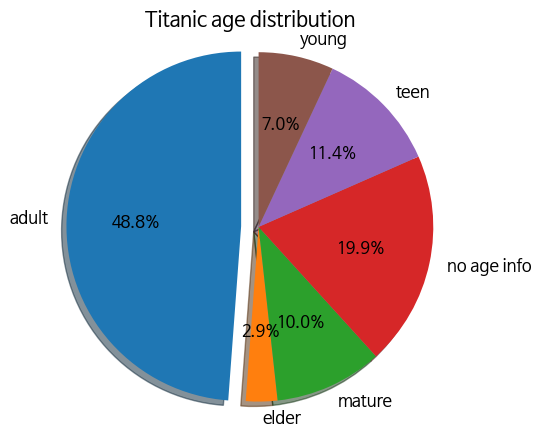

In [ ]:
# 파이 차트
import matplotlib.pyplot as plt
labels = df.groupby('age_cat').survived.count().index
sizes = df.groupby('age_cat').survived.count()
explode = (0.1,0,0,0,0,0) # "explode" the 2nd slice (Bananas) 그리고 0.1 말고 큰 숫자를 주면 더 떨어지게 되고, 적은 숫자를 주면 파이차트와 더 가까워 짐.

plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) # 여기서는 소수점 2번째 까지
plt.axis('equal') # 차트가 원형으로 유지되도록 한다. 즉, 가로세로 비율이 같도록 설정
plt.title("Titanic age distribution")
plt.show()

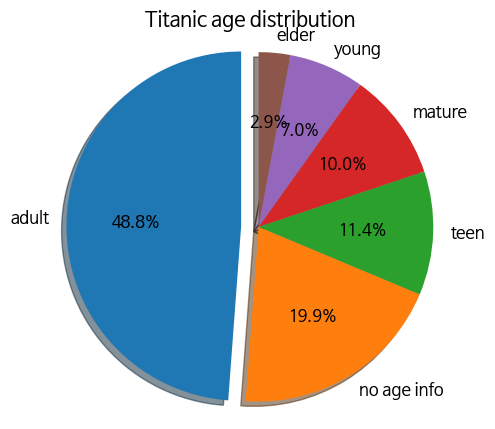

In [ ]:
# age category 함수
def get_cat(age):
    cat = ''
    if np.isnan(age): cat = 'no age info'
    elif age < 10: cat = 'young'
    elif age < 20: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat
# age_cat 컬럼 생성 후 lambda 함수로 함수 적용
df['age_cat'] = df['age'].apply(lambda x: get_cat(x))

df.head()

# 파이차트
labels = df.age_cat.value_counts().index
sizes = df.age_cat.value_counts()
explode = (0.1,0,0,0,0,0)

plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Titanic age distribution")
plt.show()

In [ ]:
df.age_cat.value_counts()

adult          435
no age info    177
teen           102
mature          89
young           62
elder           26
Name: age_cat, dtype: int64

In [ ]:
df.age_cat.value_counts().index

Index(['adult', 'no age info', 'teen', 'mature', 'young', 'elder'], dtype='object')

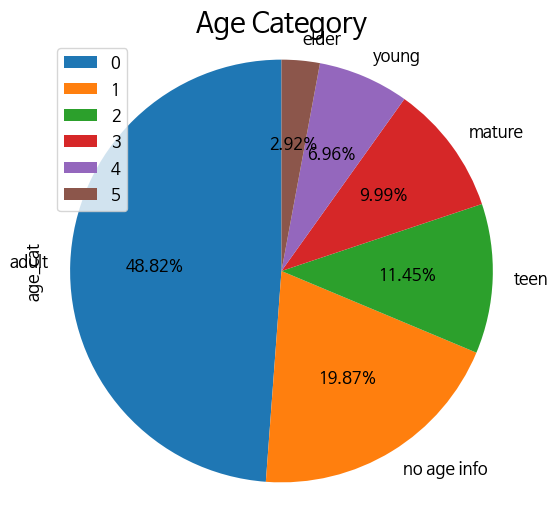

In [ ]:
df.age_cat.value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f%%', startangle=90)
plt.title('Age Category', size=20)
plt.axis('equal')
plt.legend(labels=df.age_cat.index, loc='best')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/tips.csv')

In [ ]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [ ]:
# 빈도표
import pandas as pd
import numpy as np

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
pd.pivot_table(tips,index='day',
               columns='size',
               values='total_bill',
               aggfunc='count',fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [ ]:
pc_25.sum(0) # 행방향으로 집계

size
2    156
3     38
4     37
5      5
dtype: int64

In [ ]:
pc_25.sum(1) # 열방향으로 집계

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [ ]:
# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x: x/pc_25.sum(1))

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

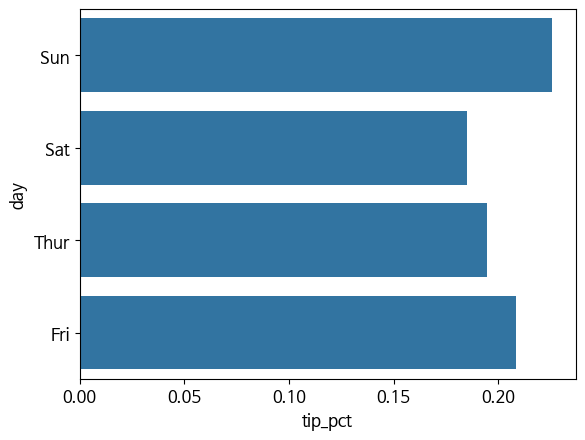

In [ ]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h',errorbar=None) # errorbar는 오차 막대를 제어, 오차가 보이게 하려면 errorbar문구를 아예 안 쓰면 됨.

<Axes: xlabel='tip_pct', ylabel='day'>

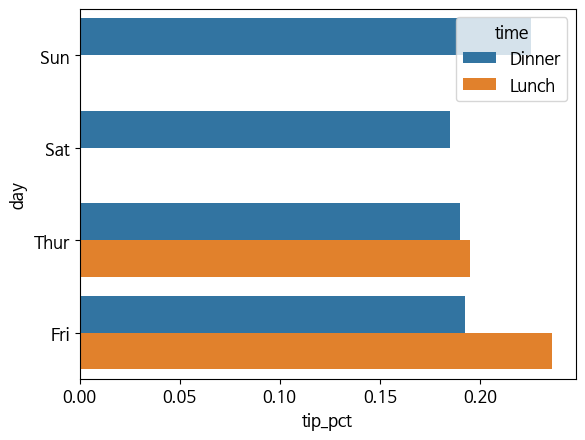

In [ ]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips, orient='h', errorbar=None)

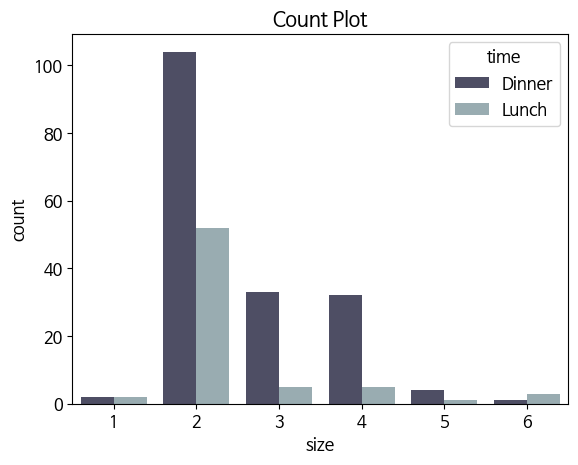

In [ ]:
# countplot()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x='size', data=tips, hue='time', palette='bone') # palette 가 양식임. 지금은 bone이라는 양식을 쓴 것.
plt.title("Count Plot")
plt.show() # 주피터노트북이나 콜랩은 이거 없어도 되지만, 다른 곳에는 이거 써야함.

In [ ]:
# np.random.normal(loc, scale, size) : 정규분포 난수 샘플 loc = 평균, sacle = 표준편차
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       4.963865
std        5.193418
min       -3.002299
25%        0.024494
50%        3.604450
75%       10.114429
max       15.825133
dtype: float64

<Axes: ylabel='Count'>

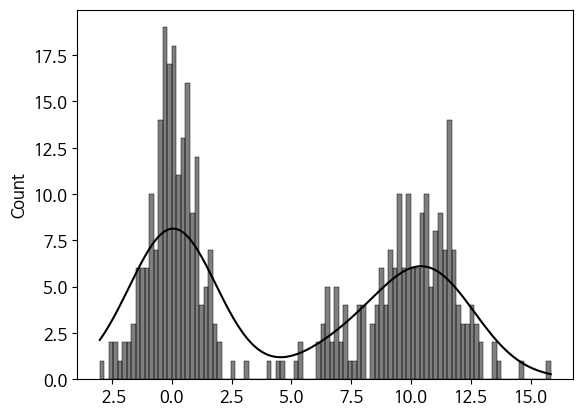

In [ ]:
sns.histplot(values,bins=100,color='k',kde=True)

### 커널밀도 추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

Q. 두개의 정규분포를 따르는 상이한 데이터 셋을 생성한 후 하나의 데이터 셋으로 병합한 후 시각화하여 데이터의 분포를 확인하세요.

<Axes: ylabel='Count'>

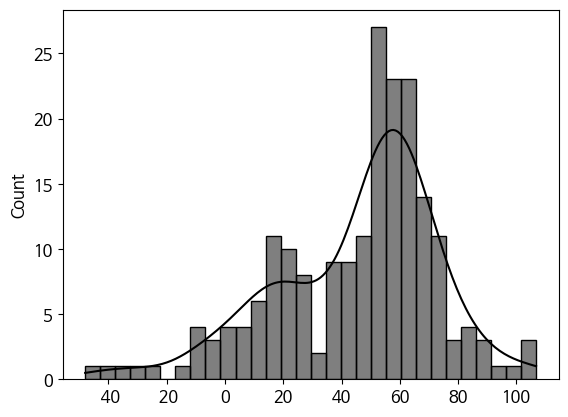

In [ ]:
data1 = np.random.normal(60,10,100)
data2 = np.random.normal(30,30,100)
data_combined = pd.Series(np.concatenate([data1,data2]))
data_combined.describe()
sns.histplot(data_combined,bins=30,color='k',kde=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

fish_multi = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<Axes: xlabel='length', ylabel='Count'>

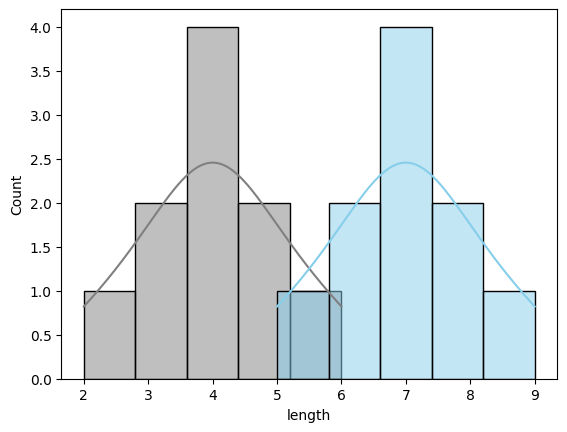

In [ ]:
import seaborn as sns
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='gray', kde=True)
sns.histplot(length_b, bins=5, color='skyblue', kde=True)

<Axes: xlabel='species', ylabel='length'>

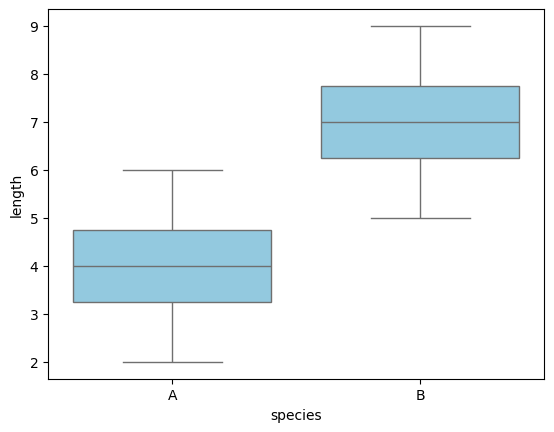

In [ ]:
# Q. box plot으로 A, B 비교
sns.boxplot(x='species',y='length',data=fish_multi, color='skyblue')

<Axes: xlabel='species', ylabel='length'>

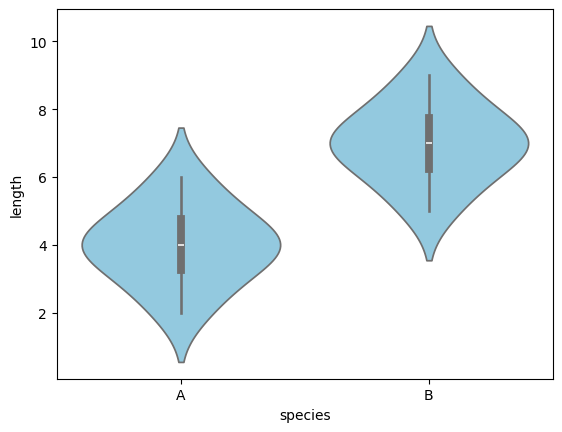

In [ ]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species',y='length',data=fish_multi,color='skyblue')

In [ ]:
cov_data = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


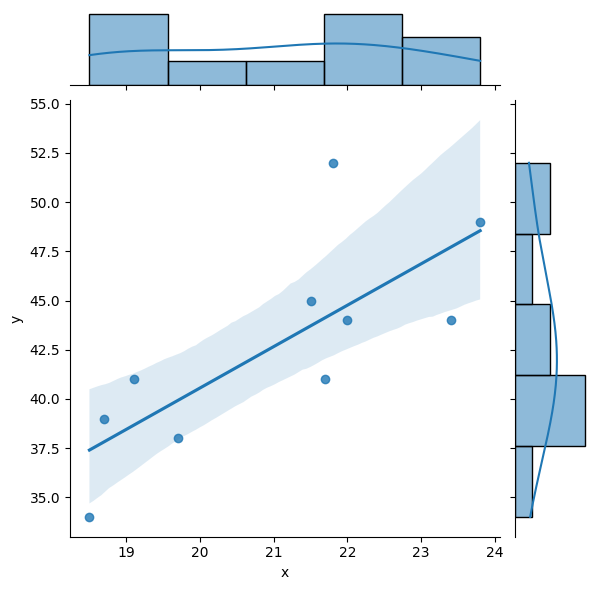

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cov_data' is your DataFrame and it has columns 'x' and 'y'
sns.jointplot(x='x',y='y',data=cov_data,kind='reg')

plt.show()

### sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

입력 매개변수의 차이:
- sns.lmplot은 data 매개변수를 통해 DataFrame을 입력받으며, x와 y는 문자열로 열 이름을 지정.
- sns.regplot에서는 x와 y가 DataFrame의 열이거나 NumPy 배열일 수 있으며, data 매개변수는 선택사항.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.

In [ ]:
# 'x'와 'y' 열을 데이터 포인트로 사용하고, 'category' 열에 따라 서로 다른 색상의 선형 회귀선을 그렸습니다.
# 각 카테고리 ('A'와 'B')에 대한 회귀선이 서로 다른 색상으로 표시
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 임의의 데이터 생성
np.random.seed(10)
data = pd.DataFrame({
    'x': np.random.rand(50),
    'y': np.random.rand(50),
    'category': np.random.choice(['A','B'],50)
})

In [ ]:
data.head()

,x,y,category
0,0.771321,0.392529,A
1,0.020752,0.093460,A
2,0.633648,0.821106,B
3,0.748804,0.151152,B
4,0.498507,0.384114,A


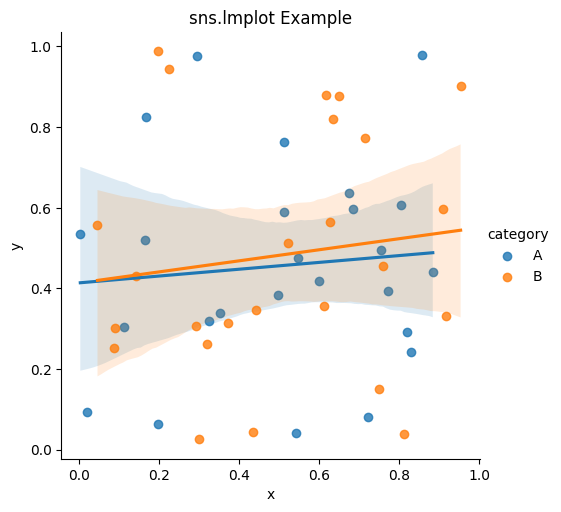

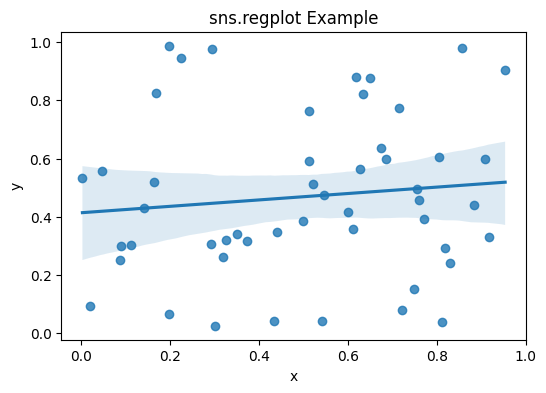

In [ ]:
# sns.lmplot 사용 예시
sns.lmplot(x='x',y='y', data=data, hue='category')
plt.title('sns.lmplot Example')
plt.show()

# sns.regplot 사용 예시
plt.figure(figsize=(6,4))
sns.regplot(x='x', y='y', data=data)
plt.title('sns.regplot Example')
plt.show()

Q. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계)

In [ ]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


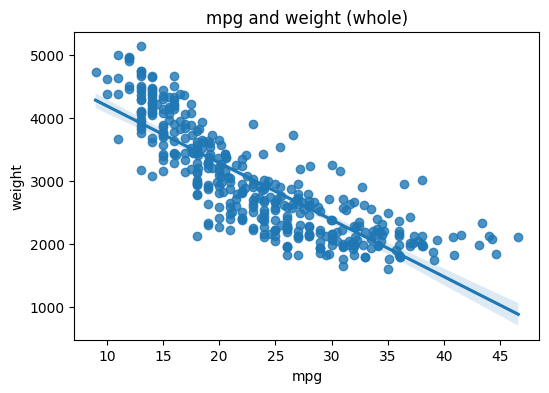

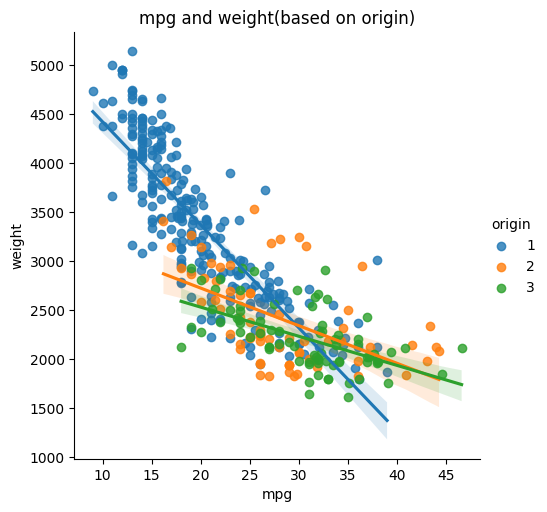

In [ ]:
# 전체 using regplot
plt.figure(figsize=(6,4))
sns.regplot(x='mpg', y='weight', data=df_auto)
plt.title('mpg and weight (whole)')
plt.show()

# origin에 따른 관계 using lmplot
sns.lmplot(x='mpg', y='weight', data=df_auto, hue='origin')
plt.title('mpg and weight(based on origin)')
plt.show()

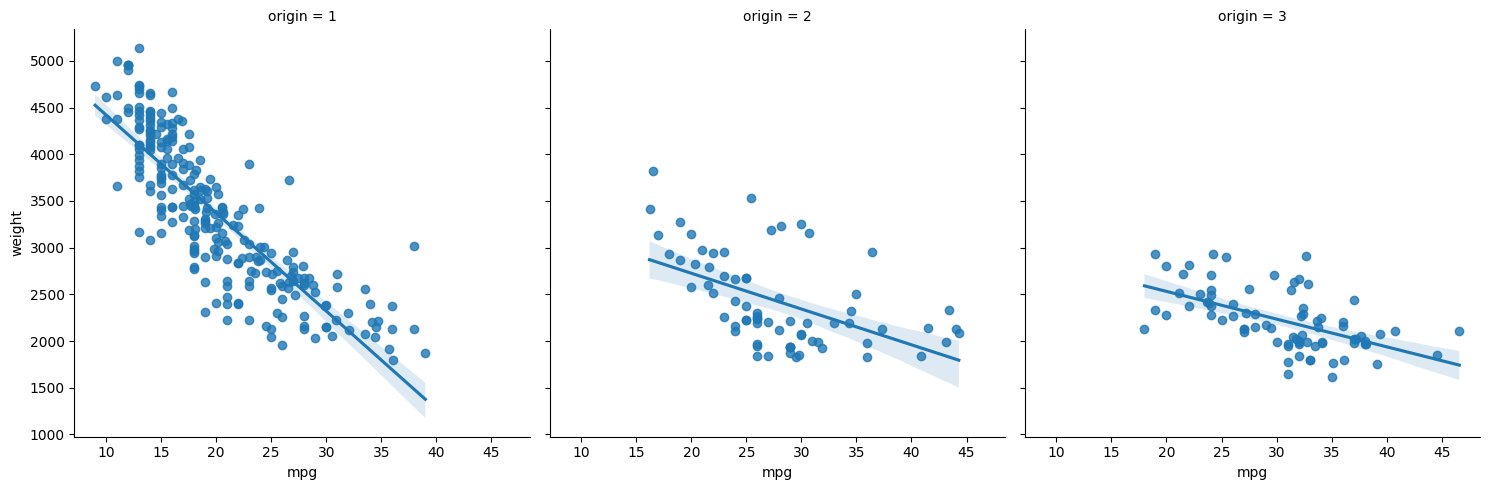

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 df_auto 저으이 필요 (예: sns, load_dataset('mpg') 사용 가능)

# mpg와 weight의 관계, 1행 2열로 표시
# 첫 번째 열: 전체 데이터에 대한 그래프
sns.lmplot(x='mpg', y='weight', data=df_auto, col='origin', col_wrap=3) # col_wrap=3는 한 행에 최대 3개의 그래프를 표시하도록 설정

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

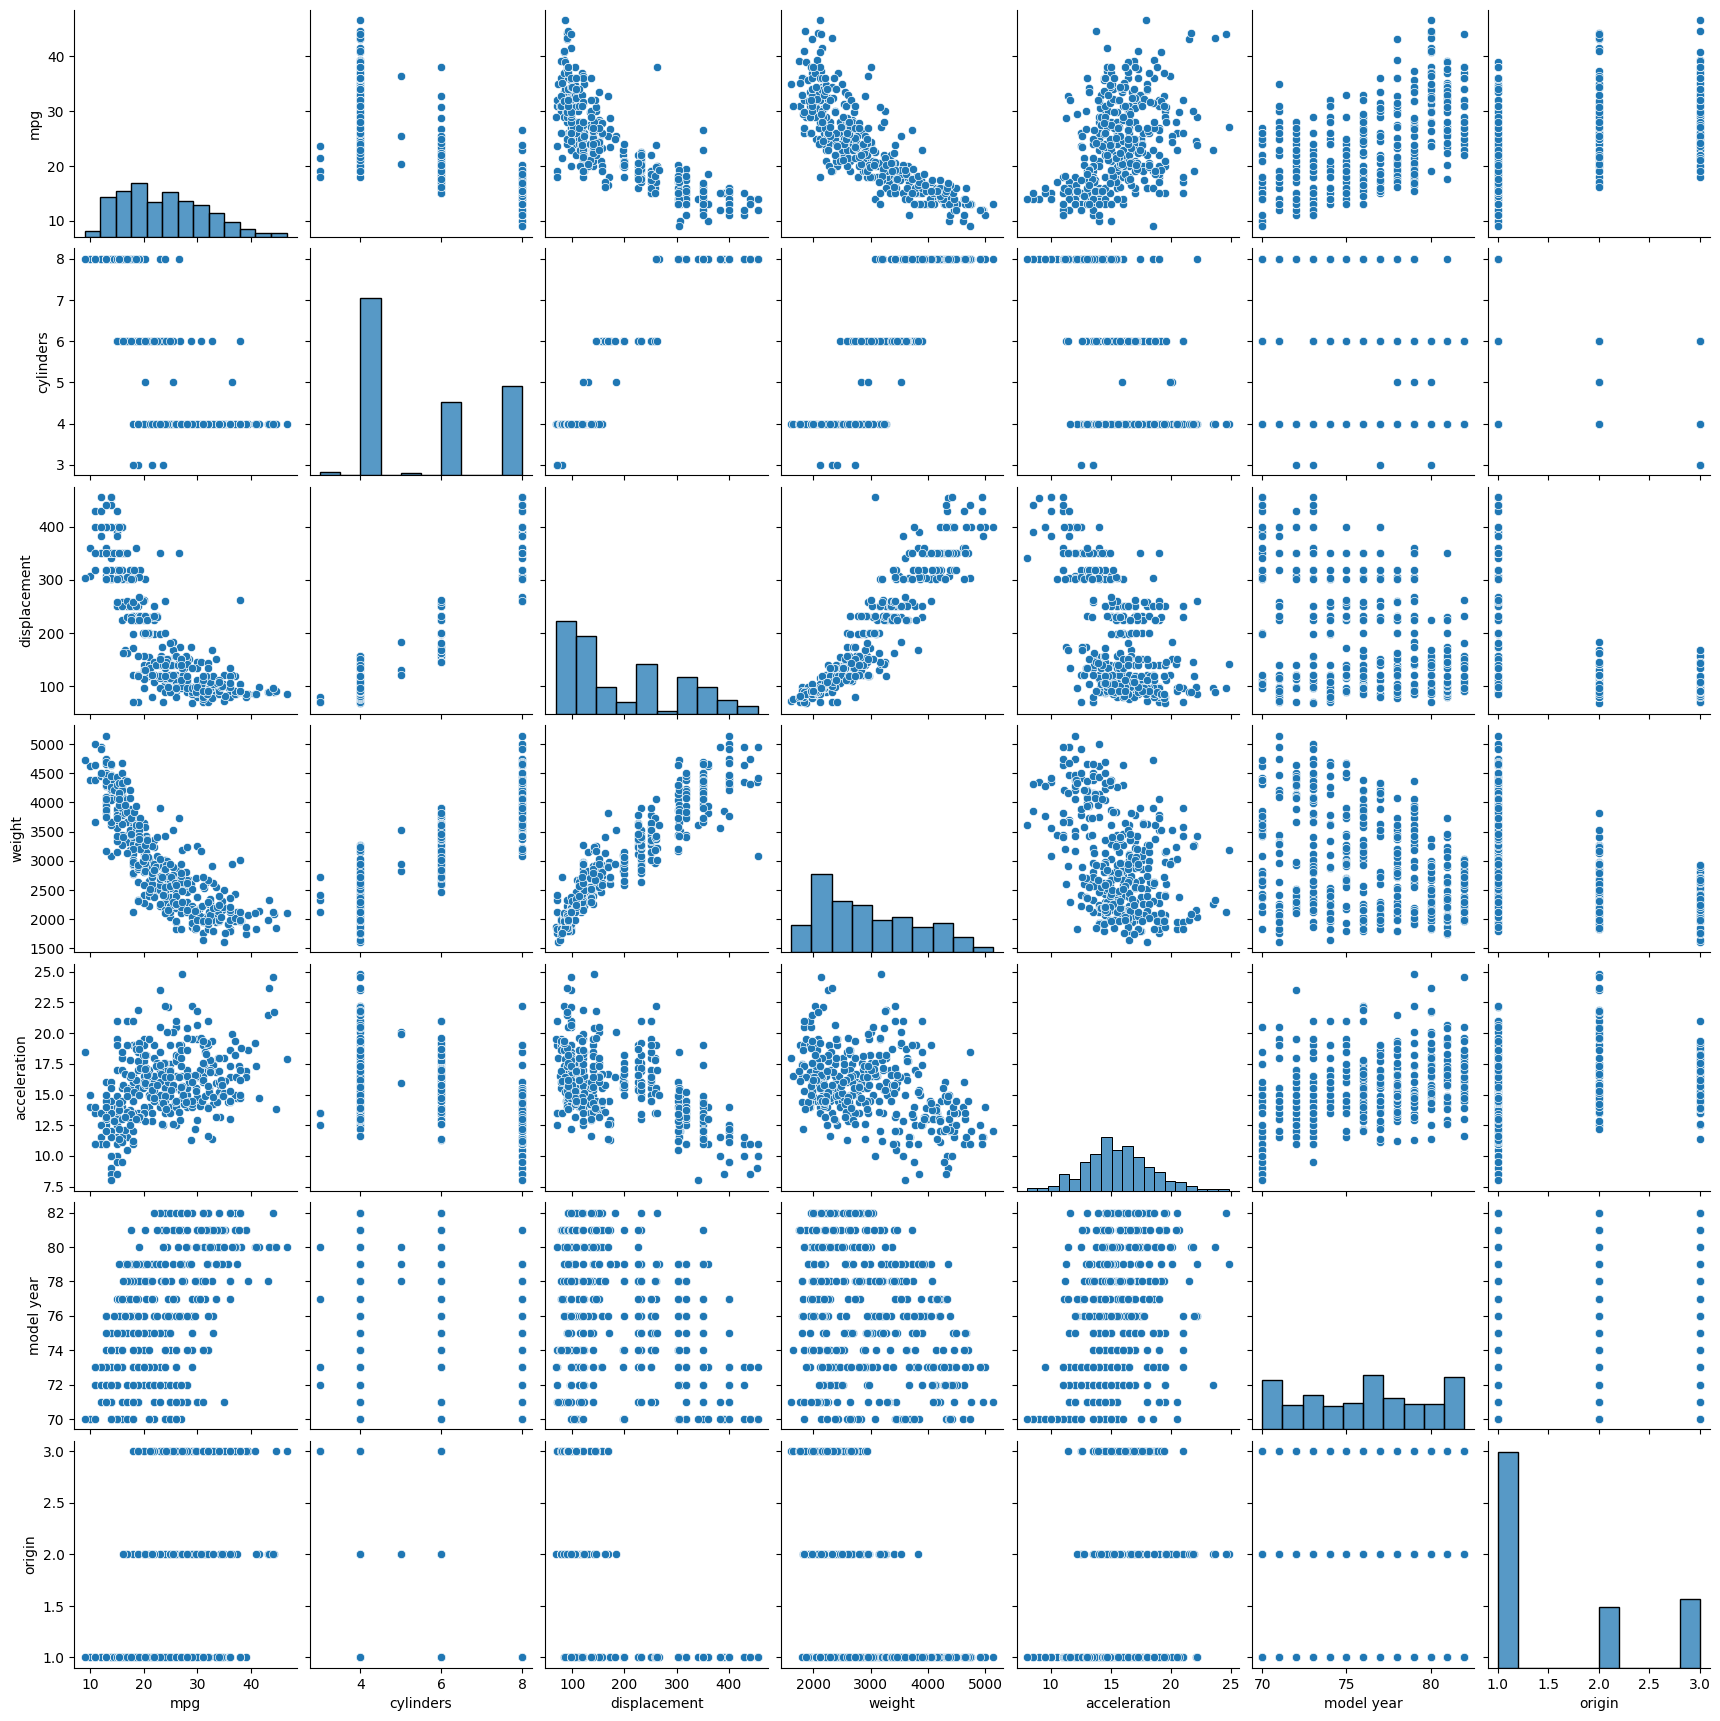

In [ ]:
import seaborn as sns
sns.pairplot(df_auto, palette='rainbow') # 열 갯수만큼 나온다. 하지만 horsepower는 '?' 데이터가 섞여있어서 안나옴. 처리하면 나올듯.

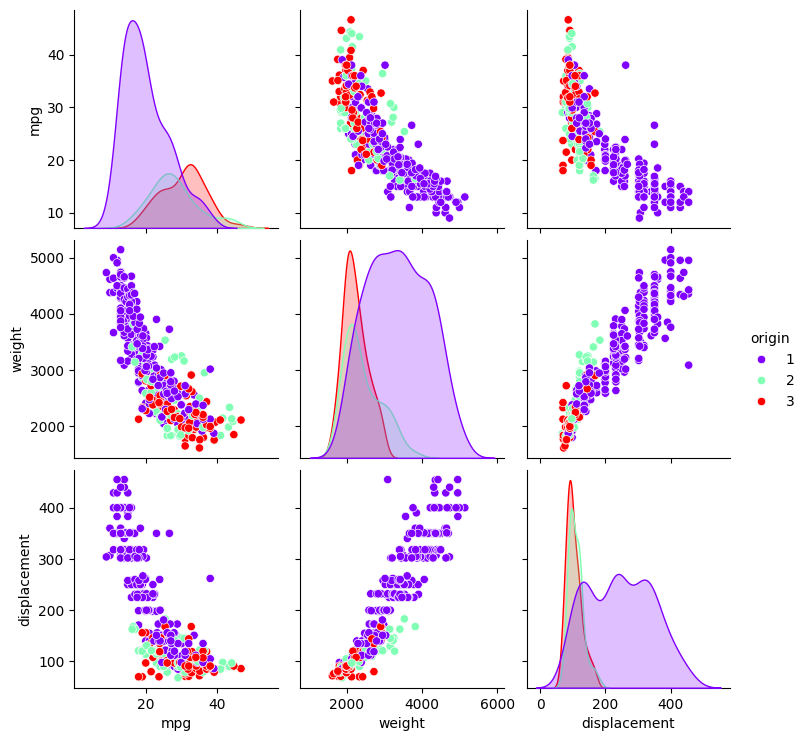

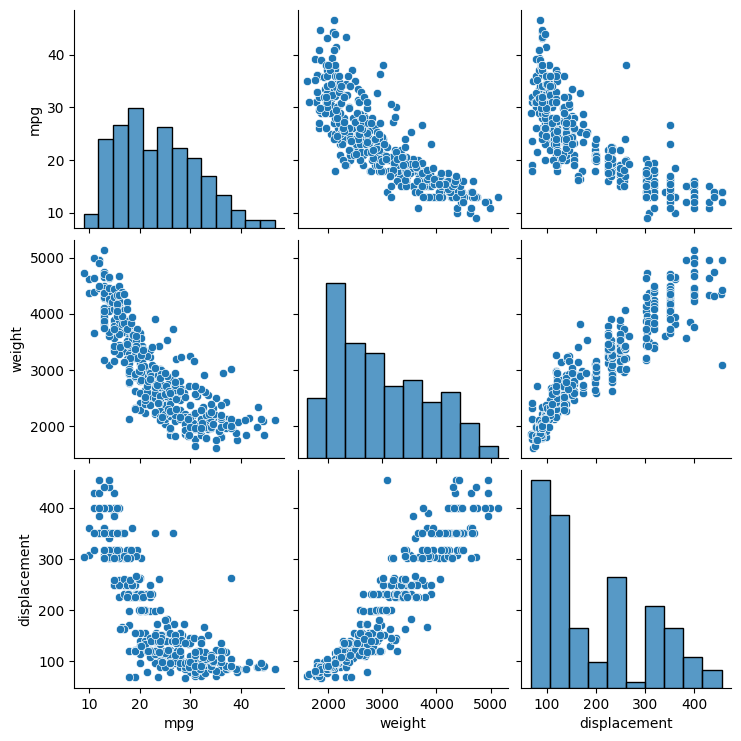

In [ ]:
import seaborn as sns
sns.pairplot(df_auto[['mpg','weight','displacement','origin']], hue='origin', palette='rainbow')
sns.pairplot(df_auto[['mpg','weight','displacement']])

<Axes: ylabel='mpg'>

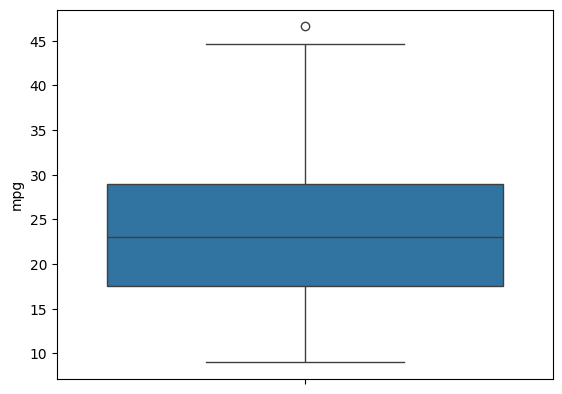

In [ ]:
sns.boxplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

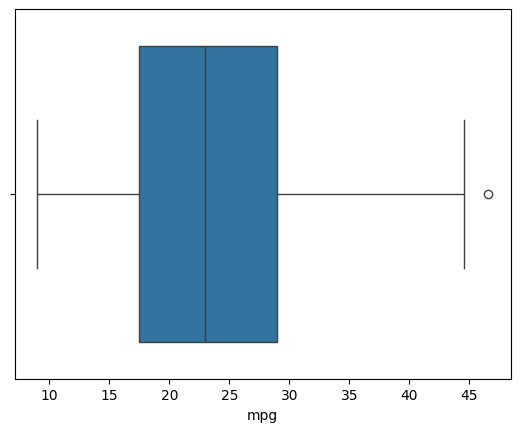

In [ ]:
sns.boxplot(data=df_auto, x='mpg')

<Axes: ylabel='mpg'>

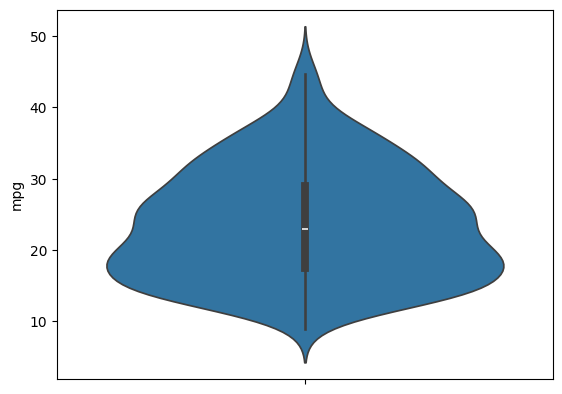

In [ ]:
sns.violinplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

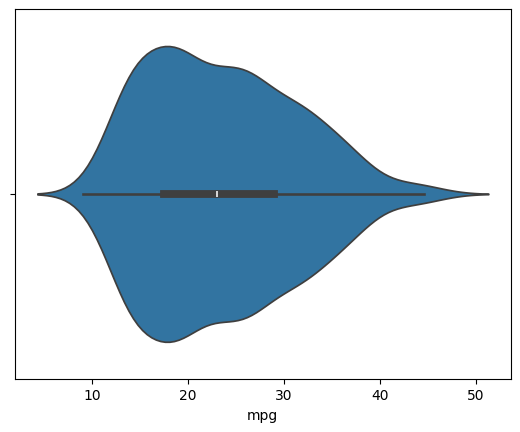

In [ ]:
sns.violinplot(data=df_auto, x='mpg')

In [ ]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
t_df[['pclass','age','fare','survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

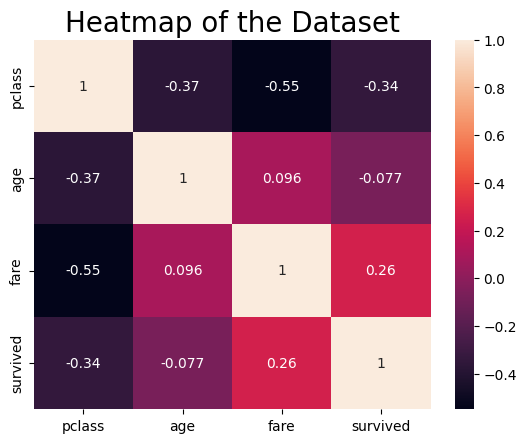

In [ ]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True) # annot 은 annotation 즉 주석을 의미
plt.title('Heatmap of the Dataset', fontsize=20)

Q. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [ ]:
pivot = pd.pivot_table(t_df,index='class',
               columns='sex',
               values='survived',
               aggfunc=(lambda x:x.sum()/x.count()),fill_value=0) # 아니면 aggfunc = 'mean' 해 줘도 됨.
sns.heatmap(pivot,annot=True)

In [ ]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],
                         aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<Axes: xlabel='None-class', ylabel='sex'>

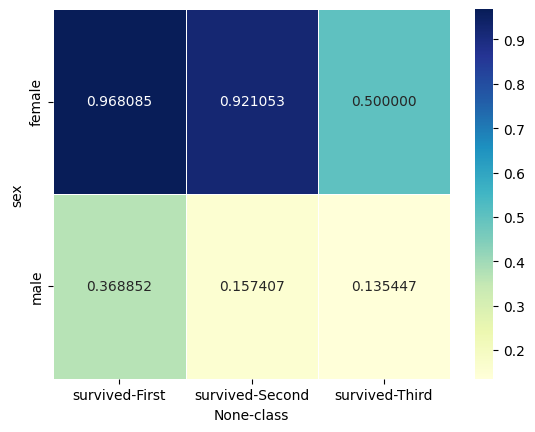

In [ ]:
sns.heatmap(table,
            annot=True, fmt='f',
            cmap='YlGnBu', # colormap 임. 대여섯개 있고 좋아하는걸로 하면 됨. 'YlGnBu', 'coolwarm', 'plasma','viridis'
            linewidth=.5,
            cbar=True)

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

<Axes: xlabel='model year', ylabel='mpg'>

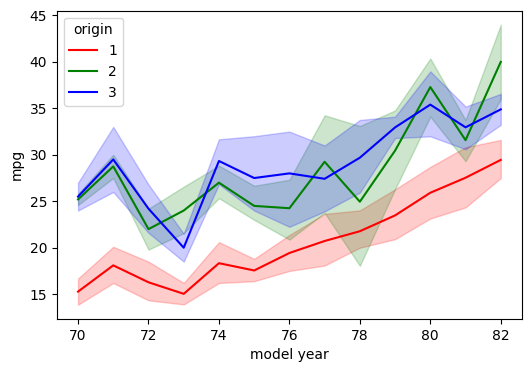

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_auto,x="model year", y="mpg", hue="origin", err_style='band',palette=['red','green','blue'])

In [ ]:
import numpy as np
fish_data = np.array([5,7,9,1,5,6,6,2,4,4,5,6,7,3,8,10])

<Axes: ylabel='Count'>

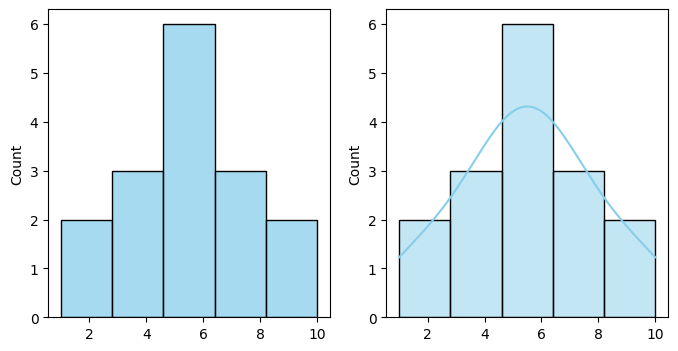

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data,color='skyblue',kde=False,ax=ax1)
sns.histplot(fish_data,color='skyblue',kde=True,ax=ax2)

##### Q1-Q5_0117
[01] 타이타닉 데이터셋(sns.load_dataset('titanic'))을 사용하여, 클래스(class)별 승객수를 나타내는 막대 그래프를 생성하세요.
- 각 막대 위에 승객수 표시


[02] sns.load_dataset('flights')을 로드하고, 이를 피벗 테이블로 변환하여 연도별 월간 승객수를 나타내세요. 이 데이터를 사용하여 히트맵을 생성하세요. (색상 맵은 자유롭게 선택)


[03] sns.load_dataset('penguins'을 사용하여 페어플롯(pairplot)을 생성하세요. 종(species)에 따라 다른 색상을 사용하세요. (hue 이용)


[04] 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.


[05] 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


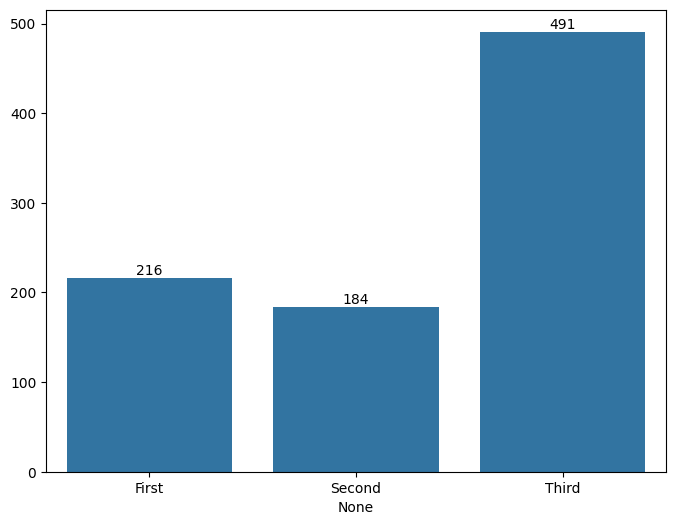

In [ ]:
# Q1_0117
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = sns.load_dataset('titanic')
counts = df['class'].value_counts()
plt.figure(figsize=(8,6))
barplot = sns.barplot(x=counts.index, y=counts.values)
barplot.bar_label(barplot.containers[0])
plt.show()

<ipython-input-3-7ff9e82ec706>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_flights = flights.pivot("month", "year", "passengers")


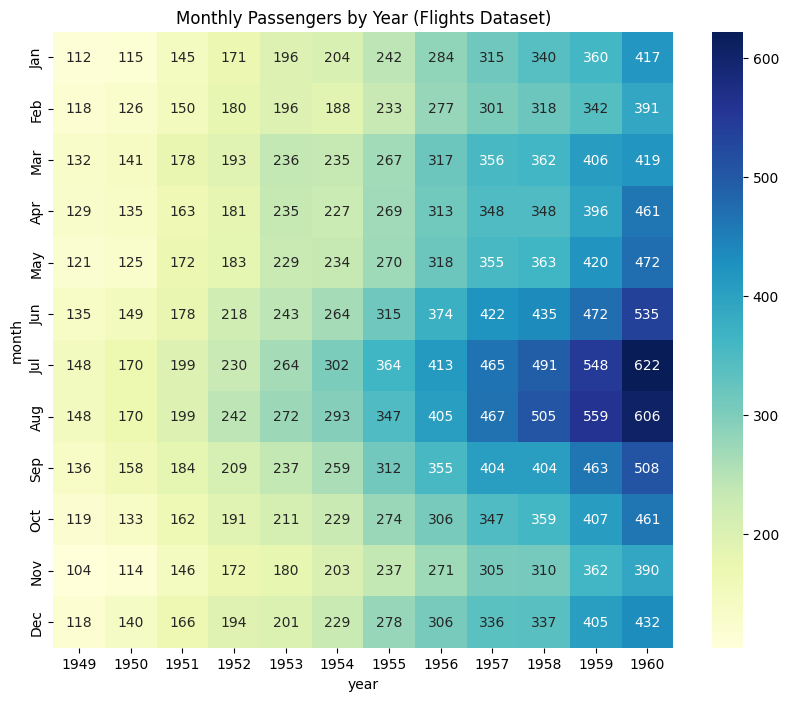

In [ ]:
# Q2_0117
flights = sns.load_dataset('flights')
pivot_flights = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_flights, annot=True, fmt="d", cmap="YlGnBu") #fmt 숫자에 대한 포맷. d 는 정수
plt.title('Monthly Passengers by Year (Flights Dataset)')
plt.show()

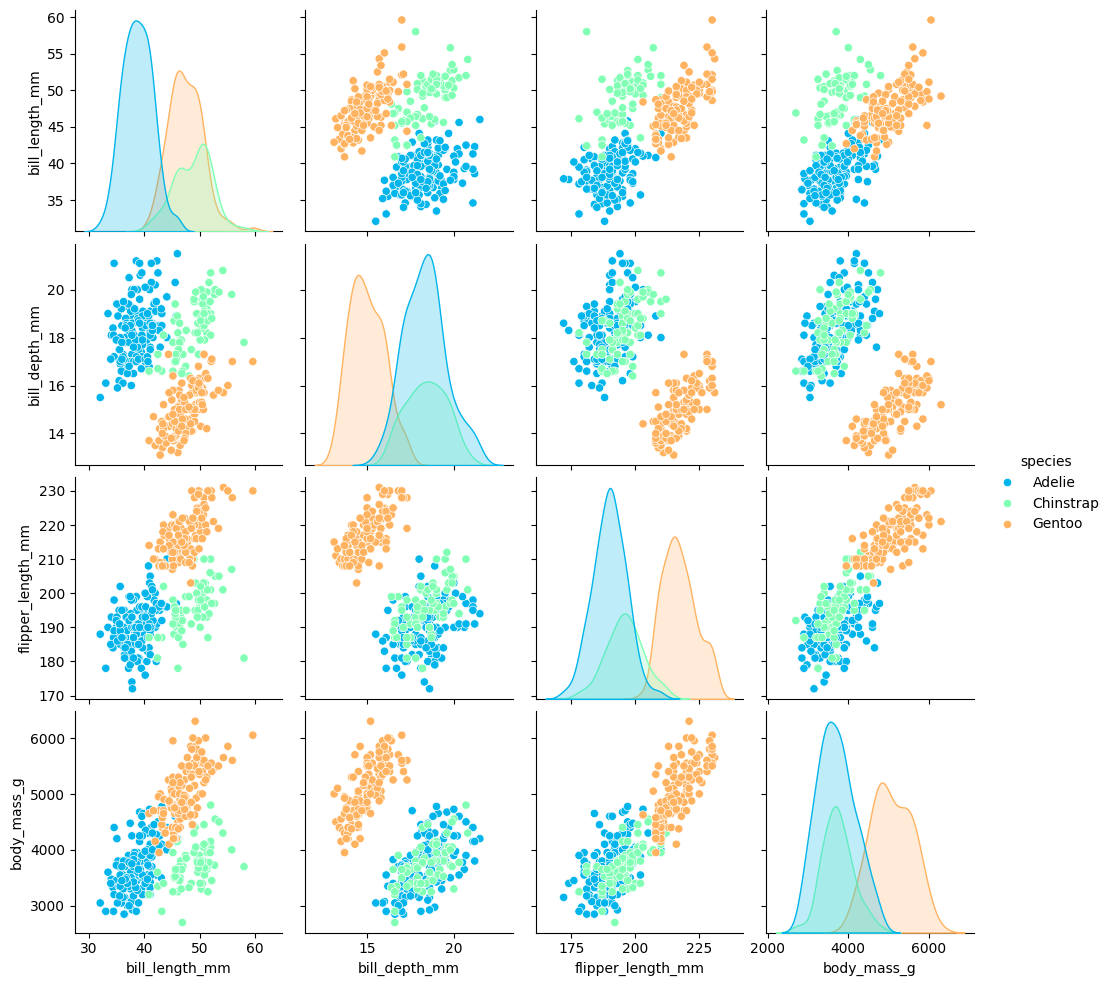

In [ ]:
# Q3_0117
import seaborn as sns
import matplotlib.pyplot as plt

df_pg = sns.load_dataset('penguins')
sns.pairplot(df_pg, hue='species', palette='rainbow')

<Axes: xlabel='pclass', ylabel='age'>

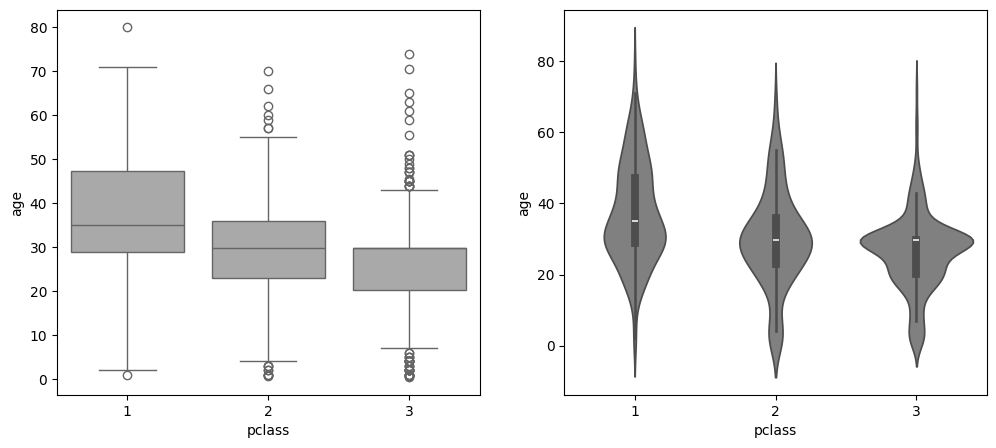

In [ ]:
# Q4_0117
ttn = sns.load_dataset('titanic')
ttn['age'].replace(np.nan, ttn['age'].mean(), inplace = True)
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.boxplot(x = ttn['pclass'], y = ttn['age'], color = 'darkgray')

plt.subplot(1,2,2)
sns.violinplot(x = ttn['pclass'], y = ttn['age'], color = 'gray')

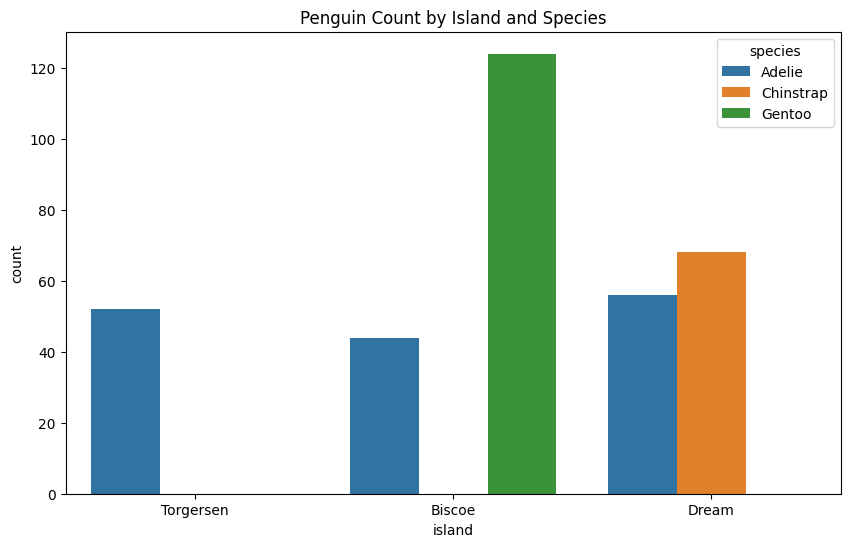

In [ ]:
# Q5_0117
import seaborn as sns
import matplotlib.pyplot as plt

# 'penguins' 데이터셋을 로드
penguins = sns.load_dataset('penguins')

# 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯 생성
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='species', data=penguins)
plt.title('Penguin Count by Island and Species')
plt.show()